# Default Of Credit Card Clients


## About this dataset
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.<br>
<b>Our task</b> is developing a model to tell if client will `default` the payment or `not`.

### Features
- X1: Amount of the given credit.<br>
- X2: Gender (male; female).<br>
- X3: Education (graduate school; university; high school; others).<br>
- X4: Marital status (married; single; others).<br>
- X5: Age (years).<br>
- X6 – X11: History of past payments.<br>

 - Tracked past monthly payment records (from April to September, 2005) are displayed as follows:<br>
    X6 = the repayment status in September, 2005<br>
    X7 = the repayment status in August, 2005.<br>
    :<br>
    X11 = the repayment status in April, 2005.<br> 
 
 - The measurement scale for the repayment status is:<br>
    -1 = pay duly<br>
    1 = payment delay for one month<br>
    2 = payment delay for two months<br>
    :<br>
    8 = payment delay for eight months<br>
    9 = payment delay for nine months and above.<br>

- X12-X17: Amount of bill statement to each customer<br>
> X12 = in September, 2005<br>
X13 = in August, 2005<br>
:<br>
X17 = in April, 2005.<br>

- X18-X23: Amount of previous payment:<br>
    that each customer paid back to the credit-card company from April 2005 through September 2005. Each of these amounts was paid to settle the preceding month's bill, either in full or partially. For example, each September 2005 amount was paid to settle the corresponding customer's August 2005 bill.

> X18 = amount paid in September, 2005<br>
X19 = amount paid in August,2005.<br>
:<br>
X23 = amount paid in April, 2005.<br>

- Y: Did the person default? (`Yes = 1`, `No = 0`)

### Dataset attributions
Website: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

Name: I-Cheng Yeh<br>
email addresses: (1) icyeh '@' chu.edu.tw (2) 140910 '@' mail.tku.edu.tw<br>
institutions: (1) Department of Information Management, Chung Hua University, Taiwan. (2) Department of Civil Engineering, Tamkang University, Taiwan.<br>
other contact information: 886-2-26215656 ext. 3181

## Load packages

In [322]:
import numpy as np
import pandas as pd
from numpy import asarray
from numpy import polyfit
from scipy.stats import pearsonr
from scipy.stats import loguniform

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()

%matplotlib inline

from datetime import datetime 

from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import LeaveOneOut
# random search 
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix


## Read the data

> The 1st row must be droped and make row 1 a header for our dataframe, as it has representative names

In [323]:
df = pd.read_excel("default of credit card clients.xls",skiprows=1)
df.head()

ID  LIMIT_BAL     SEX   EDUCATION MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0   1      20000  female  university  married   24      2      2     -1   
1   2     120000  female  university   single   26     -1      2      0   
2   3      90000  female  university   single   34      0      0      0   
3   4      50000  female  university  married   37      0      0      0   
4   5      50000    male  university  married   57     -1      0     -1   

   PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -1  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   
3      0  ...      28314      28959      29547      2000      2019      1200   
4      0  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

### Look for more details

In [324]:
df.shape

(30000, 25)

In [325]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

### Information about the features
    Length of Dataframe, Data type, and Null values

In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  int64 
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  object
 3   EDUCATION                   29669 non-null  object
 4   MARRIAGE                    29677 non-null  object
 5   AGE                         30000 non-null  int64 
 6   PAY_0                       30000 non-null  int64 
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

There are 25 columns, 30000 Rows<br>
`Education & MARRIAGE` have missing values<br>
All features are `integer` type except `SEX`, `EDUCATION`, and `MARRIAGE` are object type

In [327]:
df.describe()

ID       LIMIT_BAL           AGE         PAY_0         PAY_2  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667     35.518833     -0.016700     -0.133767   
std     8660.398374   129747.661567      9.528019      1.123802      1.197186   
min        1.000000    10000.000000     21.000000     -2.000000     -2.000000   
25%     7500.750000    50000.000000     28.000000     -1.000000     -1.000000   
50%    15000.500000   140000.000000     34.000000      0.000000      0.000000   
75%    22500.250000   240000.000000     41.000000      0.000000      0.000000   
max    30000.000000  1000000.000000    267.000000      8.000000      8.000000   

              PAY_3         PAY_4         PAY_5         PAY_6      BILL_AMT1  \
count  30000.000000  30000.000000  30000.000000  30000.000000   30000.000000   
mean      -0.166200     -0.220667     -0.266200     -0.291100   51223.330900   
std        1.196868      1.169139      1.133187      1.149988   73635.860576   
min       -2.000000     -2.000000     -2.000000     -2.000000 -165580.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000    3558.750000   
50%        0.000000      0.000000      0.000000      0.000000   22381.500000   
75%        0.000000      0.000000      0.000000      0.000000   67091.000000   
max        8.000000      8.000000      8.000000      8.000000  964511.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default payment next month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 22 columns]

There are outliers in `Age` as the max value equals 267 which seems Abnormal.<br>
`BILL_AMT1` to `BILL_AMT6` have also outliers as the min values are `Negative` although it should be zero or above.

### Check Duplication

In [328]:
df.duplicated().sum()

0

### Show Categories in EDUCATION, MARRIAGE, and SEX

In [329]:
df.EDUCATION.unique()

array(['university', 'graduate school', 'others', 'high school', nan, 0],
      dtype=object)

In [330]:
df.MARRIAGE.unique()

array(['married', 'single', nan, 0], dtype=object)

In [331]:
df.SEX.unique()

array(['female', 'male'], dtype=object)

## Data Exploring

In [332]:
sns.set(font_scale=1.3)

### Distribution of AGE

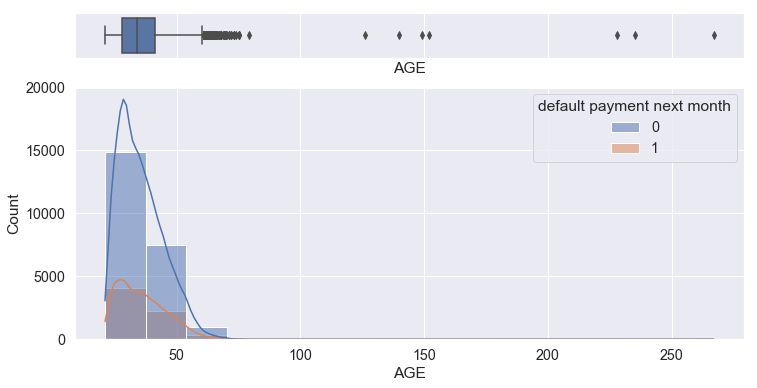

In [333]:
figure, (ax_box, ax_hist) = plt.subplots(2
                                        , sharex=True
                                        , gridspec_kw={"height_ratios": (.15, .85)}
                                        , figsize=(12,6)
                                       )

sns.boxplot(df["AGE"]
            , ax=ax_box
           )

sns.histplot(data=df
             , x="AGE"
             , label="Age"
             , kde=True
             , hue='default payment next month'
             , ax=ax_hist
             , bins=15
            )
plt.show()

As we said earlier the `age` is Right skewed and has alot of outliers

In [334]:
print(df['AGE'].value_counts(bins=15, sort=False))

(20.753, 37.4]    18955
(37.4, 53.8]       9739
(53.8, 70.2]       1284
(70.2, 86.6]         15
(86.6, 103.0]         0
(103.0, 119.4]        0
(119.4, 135.8]        1
(135.8, 152.2]        3
(152.2, 168.6]        0
(168.6, 185.0]        0
(185.0, 201.4]        0
(201.4, 217.8]        0
(217.8, 234.2]        1
(234.2, 250.6]        1
(250.6, 267.0]        1
Name: AGE, dtype: int64


After `70 years` old the number of rows is very `low`

In [335]:
df[df.AGE>=71].shape

(22, 25)

### Distribution of Bill Amount

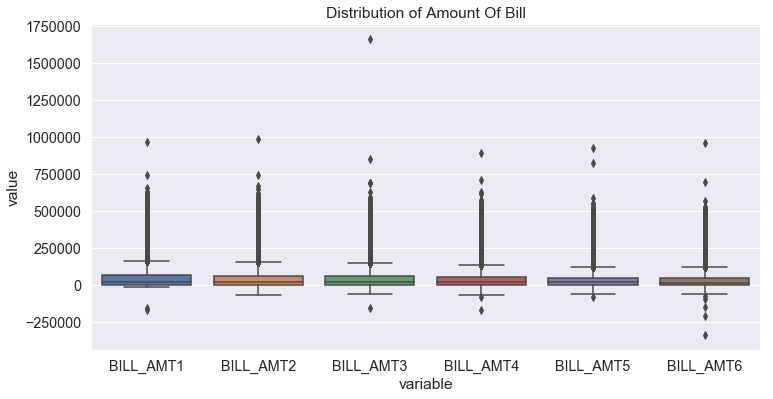

In [336]:
bill = df[['BILL_AMT{}'.format(i) for i in range(1,7)]]
plt.figure(figsize=(12,6))

sns.boxplot(x="variable"
            , y="value"
            , data=pd.melt(bill)
           )

plt.title("Distribution of Amount Of Bill")
plt.show()

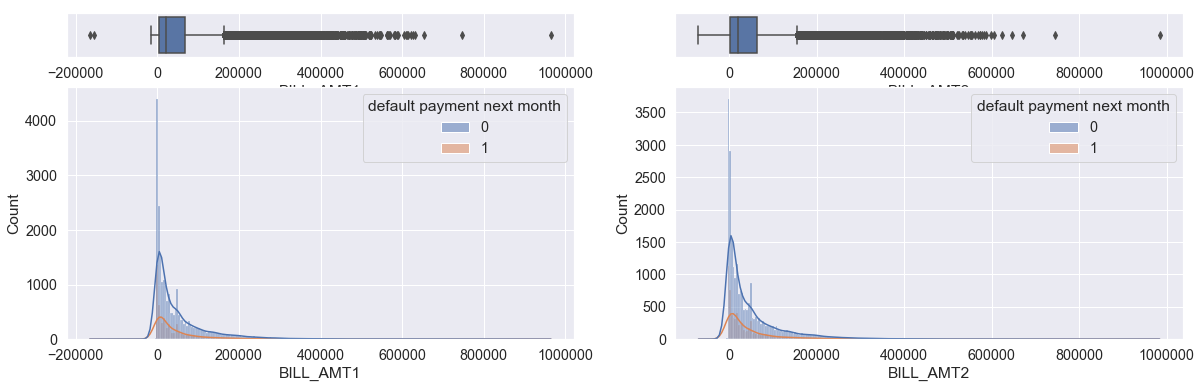

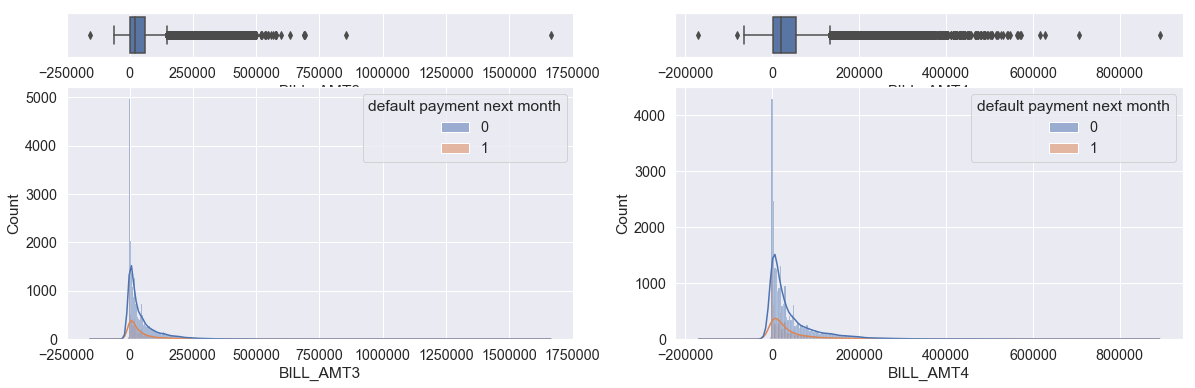

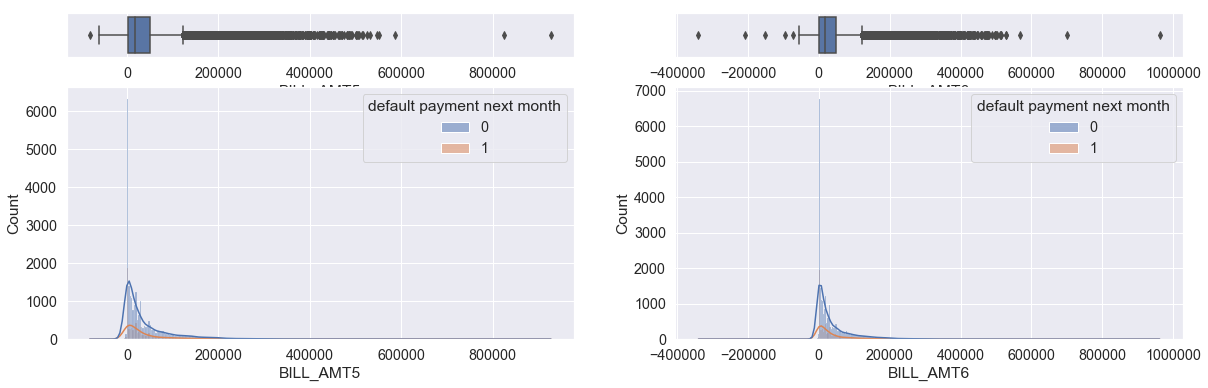

In [337]:
f, ax = plt.subplots(2,2
                    , figsize=(20,6)
                    , gridspec_kw={"height_ratios": (.15, .85)}
                   )

for i in range(1,7):
    sns.boxplot(df["BILL_AMT{}".format(i)]
                , ax=ax[0,(i-1)%2]
               )
    sns.histplot(data=df
                 , x="BILL_AMT{}".format(i)
                 , label="BILL_AMT{}".format(i)
                 , kde=True
                 , hue='default payment next month'
                 , ax=ax[1,(i-1)%2])
    if i%2==0:
        plt.show()
        if i<6:
            f, ax = plt.subplots(2,2
                        , figsize=(20,6)
                        , gridspec_kw={"height_ratios": (.15, .85)}
                       )
    

### Distribution of Payment Amount

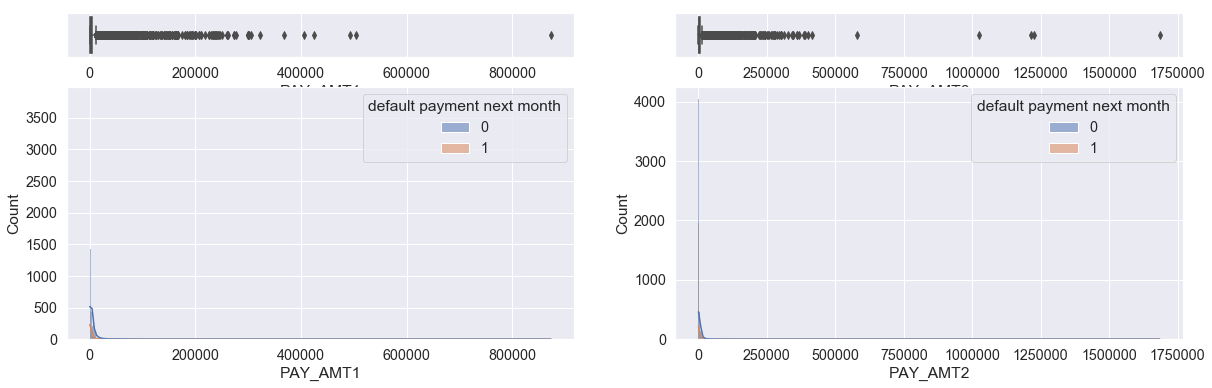

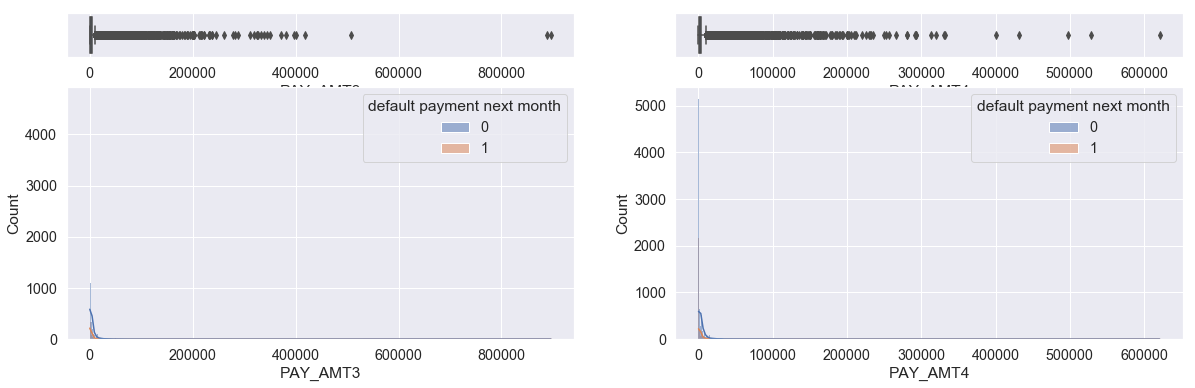

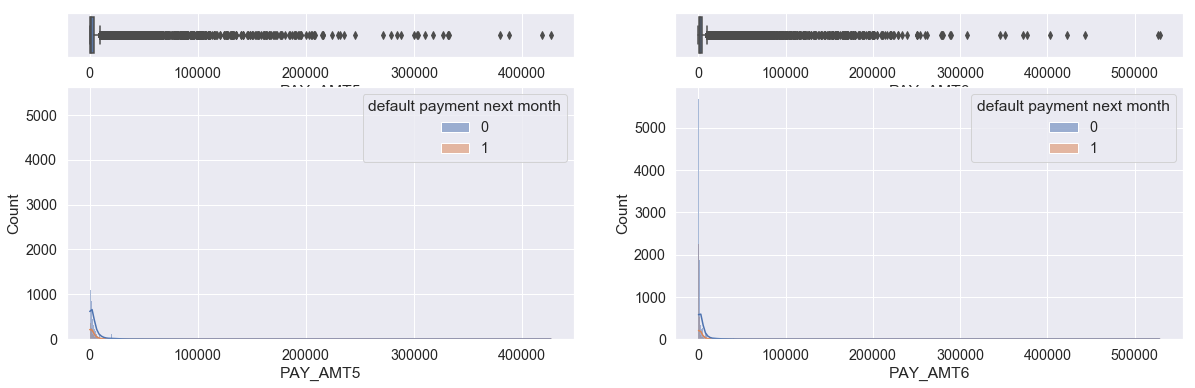

In [338]:
f, ax = plt.subplots(2,2
                    , figsize=(20,6)
                    , gridspec_kw={"height_ratios": (.15, .85)}
                   )

for i in range(1,7):
    sns.boxplot(df["PAY_AMT{}".format(i)]
                , ax=ax[0,(i-1)%2]
               )
    sns.histplot(data=df
                 , x="PAY_AMT{}".format(i)
                 , label="PAY_AMT{}".format(i)
                 , kde=True
                 , hue='default payment next month'
                 , ax=ax[1,(i-1)%2])
    if i%2==0:
        plt.show()
        if i<6:
            f, ax = plt.subplots(2,2
                        , figsize=(20,6)
                        , gridspec_kw={"height_ratios": (.15, .85)}
                       )
    

There are `huge` outliers in `Payment Amount`

### Distribution of Target `default payment next month` column

In [339]:
default = df['default payment next month'].replace({0:'NotDefault'
                          ,1:'Default'}).value_counts()
default = default.reset_index().rename(columns={'index':'name'})
default

name  default payment next month
0  NotDefault                       23364
1     Default                        6636

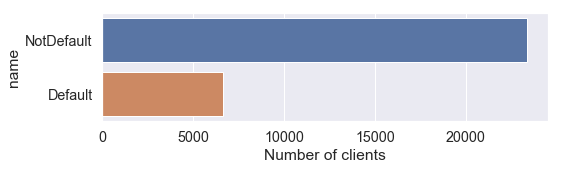

In [340]:
plt.figure(figsize=(8,2))
ax = sns.barplot(x = 'default payment next month'
            , y= 'name'
            , data=default)
ax.set_xlabel('default payment next month')
plt.xlabel('Number of clients')
plt.show()

In [341]:
ratio = default.iloc[1,1]/default['default payment next month'].sum()
ratio,default.iloc[1,1]

(0.2212, 6636)

A number of `6,636` out of 30,000 (or `22%`) of clients will `default` next month.<br>
And the dataset is `imbalance`.

## Split the data to training and Production
> before doing any preprocessing, feature engineering, .... etc  on it, to make it (test data) represent real test data/ simulate a production data.<br>
we use `Stratified` technique to ensure we preserve the ratio of classes

In [342]:
df = df.sample(frac=1)

X = df.drop(columns='default payment next month').copy()
y = df['default payment next month'].copy()

X_train,X_prod,y_train,y_prod=train_test_split(X
                                               ,y
                                               ,test_size=0.1
                                               , random_state=42
                                               , shuffle=True
                                               , stratify=y
                                              )

In [343]:
print('test: ',y_prod.sum()/len(y_prod))
print('train: ',y_train.sum()/len(y_train))

test:  0.22133333333333333
train:  0.22118518518518518


In [344]:
df_prod = X_prod
df_prod['default payment next month'] = y_prod
df_prod.to_csv('default prod.csv',index=False)

In [345]:
df_prod.shape

(3000, 25)

### Check train dataset

In [346]:
df_train = X_train
df_train['Default']=y_train
df_train

ID  LIMIT_BAL     SEX        EDUCATION MARRIAGE  AGE  PAY_0  PAY_2  \
20701  20702      30000    male  graduate school   single   33      1      2   
10709  10710     240000  female  graduate school  married   38     -2     -2   
5058    5059     200000  female  graduate school  married   35     -1     -1   
715      716      50000  female       university  married   49      0      0   
23948  23949      50000    male       university   single   22      0      0   
...      ...        ...     ...              ...      ...  ...    ...    ...   
3342    3343      50000  female       university   single   28      0      0   
643      644     370000    male       university   single   28      0      0   
12667  12668     210000  female  graduate school  married   37      0      0   
28652  28653      80000  female      high school   single   43      0      0   
2216    2217     300000  female  graduate school   single   36     -1     -1   

       PAY_3  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
20701      2      2  ...      27504      26987      26927      3000         0   
10709     -2     -2  ...          0          0          0         0         0   
5058      -1     -1  ...       5452        389        389      2106       486   
715        0      0  ...      32014      33573      29645      1613      2000   
23948      0      0  ...      19502       1971       7538      1546      1519   
...      ...    ...  ...        ...        ...        ...       ...       ...   
3342       0      0  ...      24749      25269      26847      1442      1403   
643        0      0  ...      48907      53025      51434     20000     13000   
12667     -1     -1  ...       3085       7300       6583      4519      9098   
28652      0      0  ...      78362      50001      50035      3332      3051   
2216      -1     -2  ...          0          0          0       890         0   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  Default  
20701      3000      1000      1300         0        0  
10709         0         0         0         0        0  
5058       6175         1       390       390        0  
715        1500      2000      1645      1064        0  
23948      1035       296     20300      1000        0  
...         ...       ...       ...       ...      ...  
3342       1000       919      2000      1000        0  
643        5000     10000      4000      6000        0  
12667      3085      7300      6583      5060        1  
28652      2600      1877      1767      1797        0  
2216          0         0         0         0        0  

[27000 rows x 25 columns]

We can resume our work now 

## Fill missing values

In [347]:
def fill_null(features):
    """
    fill_null(df):
        fill null value EDUCATION with others, MARRIAGE with unknown
        , SEX with most frequent value, and all numeric columns with median value.
    Parameters:
        features: pandas dataframe
            features to handle missing values in it
    Return:
        cleaned_features: pandas dataframe
            features after handling missing values.
    """
    features.EDUCATION = features.EDUCATION.fillna('others')
    features.MARRIAGE = features.MARRIAGE.fillna('unknown')
    features.SEX = features.SEX.fillna(features.SEX.mode()[0])
    cleaned_features = features.fillna(features.quantile())
    return cleaned_features

In [348]:
df_train.EDUCATION.unique()

array(['graduate school', 'university', 'high school', 'others', nan, 0],
      dtype=object)

In [349]:
df_train.isna().sum()

ID             0
LIMIT_BAL      0
SEX            0
EDUCATION    298
MARRIAGE     292
AGE            0
PAY_0          0
PAY_2          0
PAY_3          0
PAY_4          0
PAY_5          0
PAY_6          0
BILL_AMT1      0
BILL_AMT2      0
BILL_AMT3      0
BILL_AMT4      0
BILL_AMT5      0
BILL_AMT6      0
PAY_AMT1       0
PAY_AMT2       0
PAY_AMT3       0
PAY_AMT4       0
PAY_AMT5       0
PAY_AMT6       0
Default        0
dtype: int64

In [350]:
df_clean = fill_null(df_train.copy())
df_clean.isna().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Default      0
dtype: int64

In [351]:
pd.merge(df_train.EDUCATION.value_counts(),df_clean.EDUCATION.value_counts(), left_index=True, right_index=True,how='outer')

EDUCATION_x  EDUCATION_y
university             12604        12604
graduate school         9544         9544
high school             4431         4431
others                   112          410
0                         11           11

In [352]:
pd.merge(df_train.MARRIAGE.value_counts(),df_clean.MARRIAGE.value_counts(), left_index=True, right_index=True,how='outer')

MARRIAGE_x  MARRIAGE_y
0              46.0          46
married     12278.0       12278
single      14384.0       14384
unknown         NaN         292

As we see `others` value increase in education and `unknow` in marriage

### Validate values

In [353]:
def validate_values(features):
    """validate_values(features)
    convert invalide value to valide one
    Parameters: 
        features: pandas df
            features to validate
    Return:
        features: pandas df
            df after validation
    """
    # Valide value for EDUCATION
    edu_cate = ['university','graduate school','high school','others']
    # convert invalide value to others
    features['EDUCATION'] = features.EDUCATION.apply(lambda x: x if x in edu_cate else 'others')
    
    # Valide value for MARRIAGE
    mari_cate = ['single','married']
    # convert invalide value to unknown
    features['MARRIAGE'] = features.MARRIAGE.apply(lambda x: x if x in mari_cate else 'unknown')
    
    # Valide value for SEX
    sex_cate = ['male','female']
    # convert invalide value to unknown
    features['SEX'] = features.SEX.apply(lambda x: x if x in sex_cate else 'others')
    return features
    

In [354]:
df_clean = validate_values(df_clean)
df_clean.head()

ID  LIMIT_BAL     SEX        EDUCATION MARRIAGE  AGE  PAY_0  PAY_2  \
20701  20702      30000    male  graduate school   single   33      1      2   
10709  10710     240000  female  graduate school  married   38     -2     -2   
5058    5059     200000  female  graduate school  married   35     -1     -1   
715      716      50000  female       university  married   49      0      0   
23948  23949      50000    male       university   single   22      0      0   

       PAY_3  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
20701      2      2  ...      27504      26987      26927      3000         0   
10709     -2     -2  ...          0          0          0         0         0   
5058      -1     -1  ...       5452        389        389      2106       486   
715        0      0  ...      32014      33573      29645      1613      2000   
23948      0      0  ...      19502       1971       7538      1546      1519   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  Default  
20701      3000      1000      1300         0        0  
10709         0         0         0         0        0  
5058       6175         1       390       390        0  
715        1500      2000      1645      1064        0  
23948      1035       296     20300      1000        0  

[5 rows x 25 columns]

In [355]:
pd.merge(df_train.EDUCATION.value_counts(),df_clean.EDUCATION.value_counts(), left_index=True, right_index=True,how='outer')

EDUCATION_x  EDUCATION_y
0                         11          NaN
graduate school         9544       9544.0
high school             4431       4431.0
others                   112        421.0
university             12604      12604.0

In [356]:
pd.merge(df_train.MARRIAGE.value_counts(),df_clean.MARRIAGE.value_counts(), left_index=True, right_index=True,how='outer')

MARRIAGE_x  MARRIAGE_y
0              46.0         NaN
married     12278.0     12278.0
single      14384.0     14384.0
unknown         NaN       338.0

Number of `others` value in education and `unknow` in marriage increase again, as we validate the values

## Categorical Encoding
one hot encoding

In [357]:
def age_bins(age):
    """
    age_bins(age):
        convert age to bins
        ['21 to 35', '36 to 55', '56 to 70', 'above 70']
        Parameters:
            age:pandas series
        return pandas_series
    """
    age = age.apply(lambda x: x if x<=70 else 100)
    return pd.cut(x=age
               , bins=[20, 35, 55, 70, 100]
               , labels=['21 to 35'
                         , '36 to 55'
                         , '56 to 70'
                         , 'above 70'])    

In [358]:
df_clean['age_bin'] = age_bins(df_clean['AGE'])
df_clean.drop(columns=['AGE']
              ,inplace=True)
df_clean.head()

ID  LIMIT_BAL     SEX        EDUCATION MARRIAGE  PAY_0  PAY_2  \
20701  20702      30000    male  graduate school   single      1      2   
10709  10710     240000  female  graduate school  married     -2     -2   
5058    5059     200000  female  graduate school  married     -1     -1   
715      716      50000  female       university  married      0      0   
23948  23949      50000    male       university   single      0      0   

       PAY_3  PAY_4  PAY_5  ...  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
20701      2      2      2  ...      26987      26927      3000         0   
10709     -2     -2     -2  ...          0          0         0         0   
5058      -1     -1      0  ...        389        389      2106       486   
715        0      0      0  ...      33573      29645      1613      2000   
23948      0      0      0  ...       1971       7538      1546      1519   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  Default   age_bin  
20701      3000      1000      1300         0        0  21 to 35  
10709         0         0         0         0        0  36 to 55  
5058       6175         1       390       390        0  21 to 35  
715        1500      2000      1645      1064        0  36 to 55  
23948      1035       296     20300      1000        0  21 to 35  

[5 rows x 25 columns]

In [359]:
def cate_encode(df):
    return pd.get_dummies(df)

In [360]:
df_clean = cate_encode(df_clean)

In [361]:
df_clean = pd.merge(df_clean.drop(columns='Default')
                    ,df_clean.Default
                    ,left_index=True
                    ,right_index=True
                   )

In [362]:
df_clean.head()

ID  LIMIT_BAL  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  \
20701  20702      30000      1      2      2      2      2      2      25826   
10709  10710     240000     -2     -2     -2     -2     -2     -2          0   
5058    5059     200000     -1     -1     -1     -1      0     -1      10118   
715      716      50000      0      0      0      0      0      0      34962   
23948  23949      50000      0      0      0      0      0     -1      47871   

       BILL_AMT2  ...  EDUCATION_others  EDUCATION_university  \
20701      27274  ...                 0                     0   
10709          0  ...                 0                     0   
5058        2105  ...                 0                     0   
715        32275  ...                 0                     1   
23948      44546  ...                 0                     1   

       MARRIAGE_married  MARRIAGE_single  MARRIAGE_unknown  age_bin_21 to 35  \
20701                 0                1                 0                 1   
10709                 1                0                 0                 0   
5058                  1                0                 0                 1   
715                   1                0                 0                 0   
23948                 0                1                 0                 1   

       age_bin_36 to 55  age_bin_56 to 70  age_bin_above 70  Default  
20701                 0                 0                 0        0  
10709                 1                 0                 0        0  
5058                  0                 0                 0        0  
715                   1                 0                 0        0  
23948                 0                 0                 0        0  

[5 rows x 34 columns]

### Check Correlation between Features

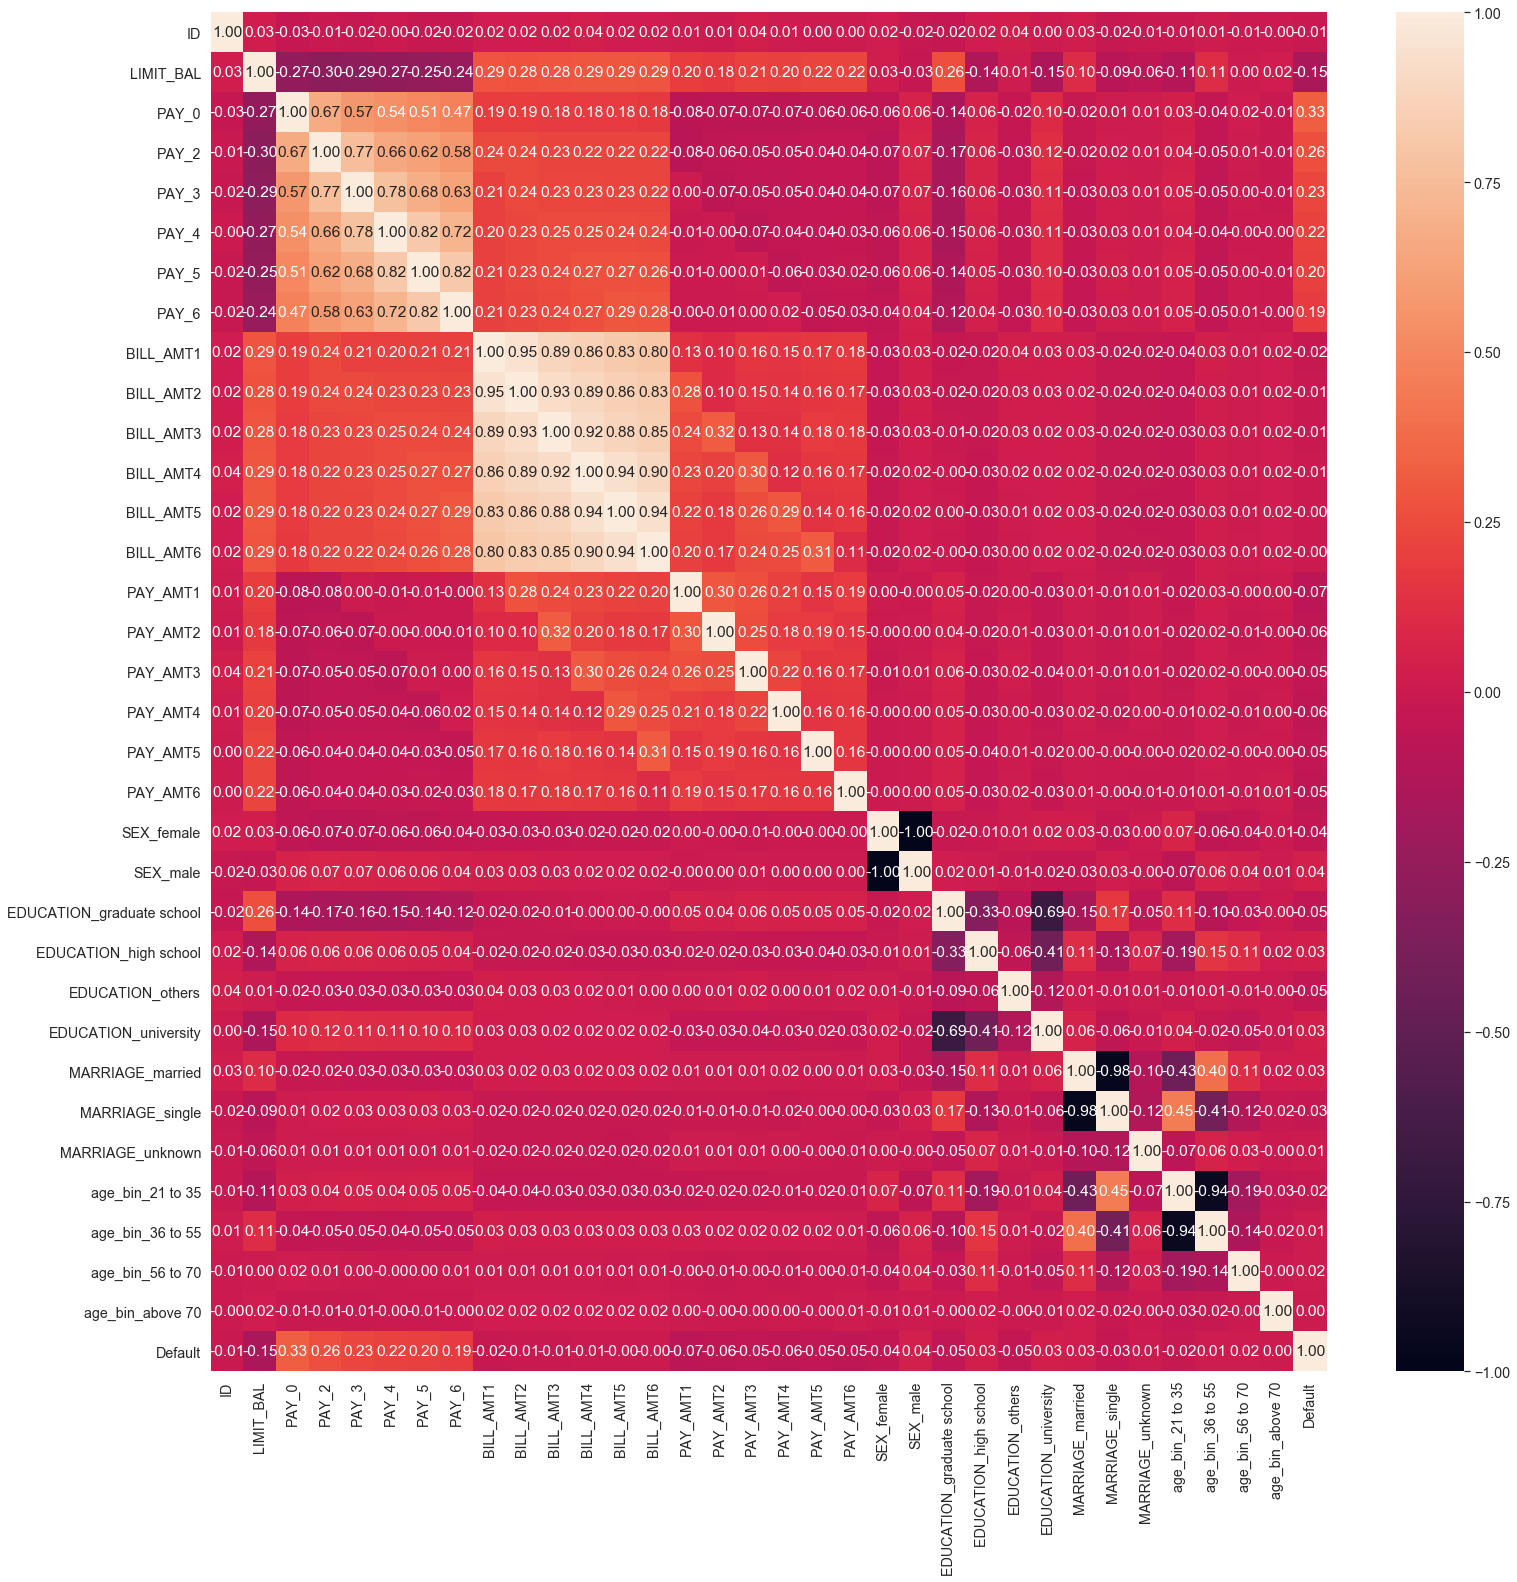

In [363]:
correlation_matrics = df_clean.corr()
plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrics, annot=True,fmt=".2f")
plt.show()

### Remove Correlated Features
Because there are some correlations, let's remove the correlated data that has more than 0.89 correlation.

In [364]:
corr_over_col = []
corr_col = []
def remove_corr(df,thresh=0.85):
    """
    remove_corr(df,thresh=0.85):
        return columns with thresh correlation to drop
    Parameters:
        df: dataframe
            correlation_matrix
        thresh: float
            correlation threshold
    Return:
        removed_col: set()
            columns' name to be droped
    """
    removed_col=set()
    for col in df.columns:
        if col in removed_col:
            continue
        else:
            upper_thresh = (df[col]>=thresh)&(df[col]<1)
            lowwer_thresh = (df[col]<=-1*thresh)
            idx = np.where(upper_thresh | lowwer_thresh)
            temp = df.iloc[idx].index
            
            if len(temp):
                removed_col.update(list(temp))
    return list(removed_col)

In [365]:
corr_col = remove_corr(correlation_matrics,0.89)
print(corr_col)

['SEX_male', 'BILL_AMT2', 'BILL_AMT6', 'age_bin_36 to 55', 'MARRIAGE_single', 'BILL_AMT4']


In [366]:
df_clean.drop(columns=corr_col
              ,inplace=True)

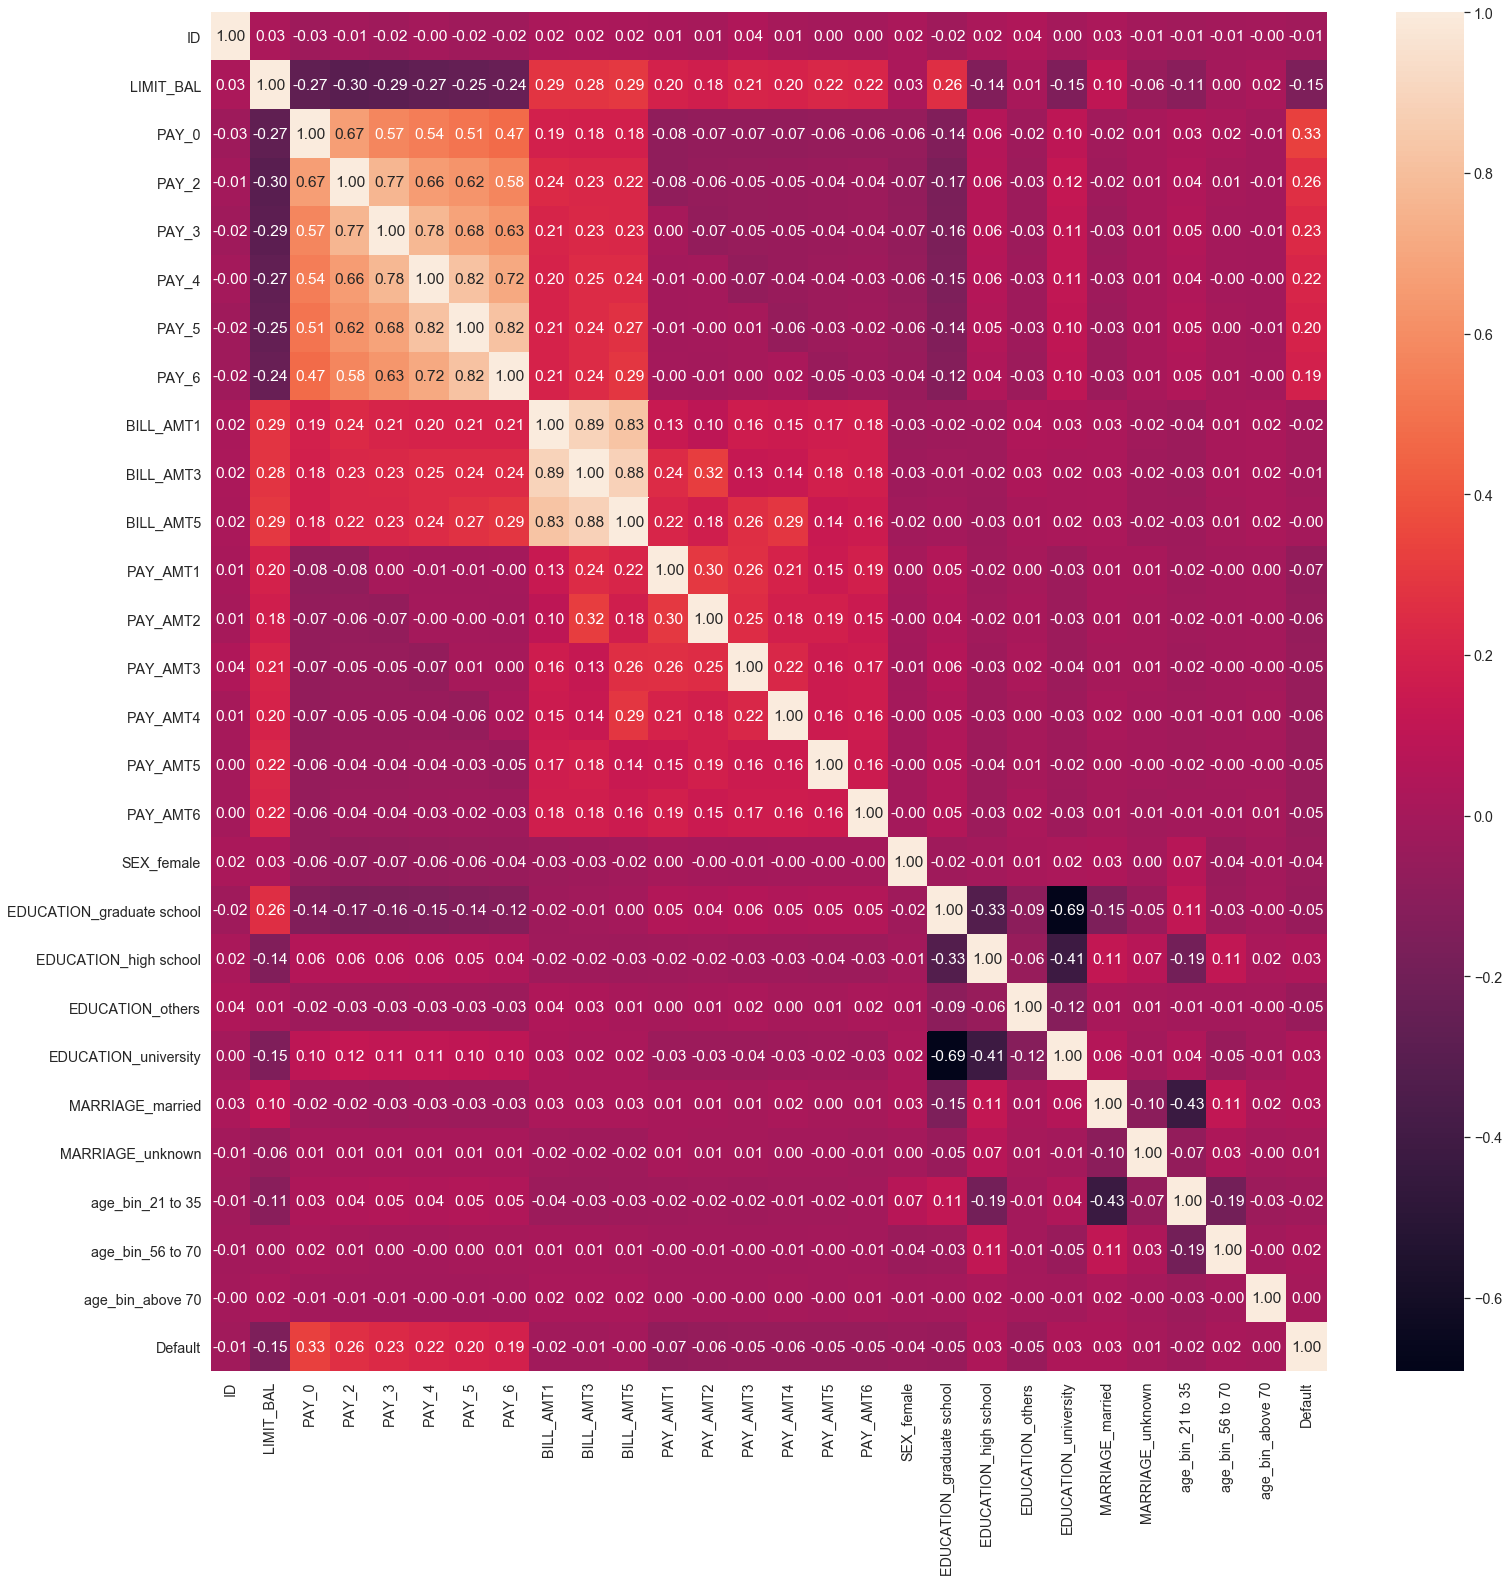

In [367]:
correlation_matrics = df_clean.corr()
plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrics, annot=True,fmt=".2f")
plt.show()

### Check for Duplication

In [368]:
df_clean.duplicated().sum()

0

In [369]:
df_clean.shape

(27000, 28)

## Functions for Model evaluate/select/build

In [405]:
def preprocessing(df,work_type=None,with_corr=False):

    # Validate values
    df = validate_values(df)
    
    # fill null values
    df = fill_null(df)
    
    # convert age to bins
    df['age_bin'] = age_bins(df['AGE'])
    df.drop(columns='AGE'
                ,inplace=True)
    
    # categorical encoding "one hot encoding"
    df = cate_encode(df)
    
    # Remove strong correlations
    if with_corr:
        if work_type=='over':
            
            drop_col = corr_over_col.copy()
        else:
            drop_col = corr_col.copy()
        drop_col.append('ID')
        df.drop(columns=drop_col
                  ,inplace=True)

    return df


### Model Evaluation

In [373]:
def eval_matrix(y_true, y_pred, title='training'):
    """
    eval_matrix(y_true, y_pred, title='training')
        evaluate a model using confusion matrix 
    Parameters:
        y_true: pandas sereis
            labels/true values
        y_pred: pandas sereis
            predicted values
        title: str
            type of evaluation traing/validation/test
    Return:
        None
    """
    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy}')
    
    # Calculate precision
    precision = precision_score(y_true, y_pred)
    print(f'Precision: {precision}')
    
    # Calculate recall
    recall = recall_score(y_true, y_pred)
    print(f'Recall: {recall}')
    
    # Calculate f1
    f1 = f1_score(y_true, y_pred)
    print(f'F1_score: {f1}')
    
    confusion_matrix = pd.crosstab(index=y_true
                                   , columns=np.round(y_pred)
                                   , rownames=['True']
                                   , colnames=['predictions']
                                  ).astype(int)
    plt.figure(figsize = (5,5))
    sns.heatmap(confusion_matrix
                , annot=True
                , fmt='.2f'
                , cmap="YlGnBu"
               ).set_title('Confusion Matrix: {}'.format(title)) 
    plt.show()
    

### Model Selection

In [439]:
# get a list of models to evaluate
def get_models(class_weight=None):
    """
    get_models()
     get a list of models to evaluate
    Parameters:
        None
    Return:
        List
    """
    if class_weight:
        dict_weight = {0:1,1:int(class_weight)}
    else:
        dict_weight =class_weight
    models = list()
    models.append(LogisticRegression(class_weight=dict_weight))
    models.append(SGDClassifier(class_weight=dict_weight))
    models.append(LinearSVC(class_weight=dict_weight))
    models.append(RandomForestClassifier(class_weight=dict_weight))
    models.append(XGBClassifier(scale_pos_weight=class_weight))
    return models

In [169]:
def kfold_model(model, X, y, k, metric='accuracy'):
    """
    kfold_model(model, X, y, k, metric='accuracy')
        evaluate a model using kfold cross validation
    Parameters:
        model:estimator()
            model to evaluate
        X: pandas dataframe
            features
        y: pandas sereis
            labels/target column
        k: int
            number of kfold
        metric: str
            scorring metric
    Return:
        scores: list
            model scores
    """
    kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=1)
    scores = []
    i=0
    for train, val in kfold.split(X,y):
        i+=1
        x_train, x_val = X.iloc[train,:], X.iloc[val,:]
        y_train, y_val = y.iloc[train], y.iloc[val]
        
        model.fit(x_train,y_train)
        print('*'*10,'{} fold'.format(i),'*'*10)
        pred_train =model.predict(x_train)
        eval_matrix(y_train, pred_train)
        
        pred_val = model.predict(x_val)
        eval_matrix(y_val, pred_val, 'Validation')
        
        if metric=='accuracy':
            scores.append(accuracy_score(y_val,pred_val))
        elif metric=='precision':
            scores.append(precision_score(y_val,pred_val))
        elif metric=='recall':
            scores.append(recall_score(y_val,pred_val))
        elif metric=='f1':
            scores.append(f1_score(y_val,pred_val))
            
    return scores

In [299]:
# define test conditions
def model_sel(X, y,model=None,class_weight=None, metric='accuracy', k=5, draw=False):
    # get the list of models to consider
    models = []
    if model==None:
        models = get_models(class_weight)
    else:
        models.append(model)
    
    # evaluate each model
    for model in models:
        print('>{m}: '.format(m=type(model).__name__))
        cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=1)
        if draw:
            scores = kfold_model(model
                                   ,X
                                   ,y
                                   ,k
                                   ,metric)
        else:
            scores = cross_val_score(model
                            ,X
                            ,y
                            ,cv=cv
                            ,scoring=metric
                            ,n_jobs=-1)
        # summarize progress
        print('>{m}: {a} {met}={s} '.format(m=type(model).__name__, met=metric, s=scores, a=np.mean(scores)))
        print('*'*50)

## How to work with imbalance dataset
As we know eariler the data is imbalance so we have Two methods:<br>
    <ol>
    <li> The Methods at Algorithm Level.</li>
    <li>The Methods at Data Level.</li>
    </ol>

### 1.The Methods at Algorithm Level.
The methods at algorithm level operate on the algorithms other than the data sets, algorithm can achieve better prediction for the minority class.

#### Model training

In [370]:
X=df_clean.drop(columns=['Default','ID'])
y=df_clean.Default

In [371]:
X.head()

LIMIT_BAL  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  \
20701      30000      1      2      2      2      2      2      25826   
10709     240000     -2     -2     -2     -2     -2     -2          0   
5058      200000     -1     -1     -1     -1      0     -1      10118   
715        50000      0      0      0      0      0      0      34962   
23948      50000      0      0      0      0      0     -1      47871   

       BILL_AMT3  BILL_AMT5  ...  SEX_female  EDUCATION_graduate school  \
20701      25744      26987  ...           0                          1   
10709          0          0  ...           1                          1   
5058         483        389  ...           1                          1   
715        31253      33573  ...           1                          0   
23948      28628       1971  ...           0                          0   

       EDUCATION_high school  EDUCATION_others  EDUCATION_university  \
20701                      0                 0                     0   
10709                      0                 0                     0   
5058                       0                 0                     0   
715                        0                 0                     1   
23948                      0                 0                     1   

       MARRIAGE_married  MARRIAGE_unknown  age_bin_21 to 35  age_bin_56 to 70  \
20701                 0                 0                 1                 0   
10709                 1                 0                 0                 0   
5058                  1                 0                 1                 0   
715                   1                 0                 0                 0   
23948                 0                 0                 1                 0   

       age_bin_above 70  
20701                 0  
10709                 0  
5058                  0  
715                   0  
23948                 0  

[5 rows x 26 columns]

In [375]:
X_train,X_test,y_train,y_test=train_test_split(X
                                               ,y
                                               ,test_size=0.1
                                               , random_state=42
                                               , shuffle=True
                                               , stratify=y
                                              )

In [376]:
weight_class = np.round((y_train==0).sum()/(y_train==1).sum())
weight_class

4.0

In [291]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

#### Model predict & evaluate

In [292]:
preds = model.predict(X_test)

Accuracy: 0.6925925925925925
Precision: 0.30287648054145516
Recall: 0.2998324958123953
F1_score: 0.30134680134680136


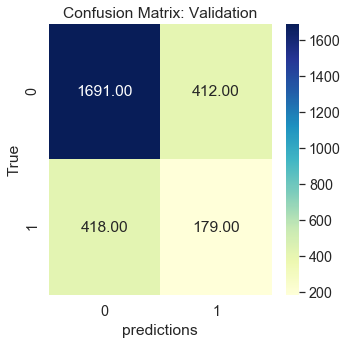

In [293]:
eval_matrix(y_test, preds, 'Validation')

F1_score metric is low, let's try another model.

### Model Selection

In [302]:
model_sel(X_train, y_train,class_weight= weight_class, metric='f1')

>LogisticRegression: 
>LogisticRegression: 0.3529964143757002 f1=[0.36015326 0.35231181 0.3419062  0.34487896 0.36573185] 
**************************************************
>SGDClassifier: 
>SGDClassifier: 0.23082822080184498 f1=[0.         0.26403539 0.31398201 0.3621649  0.21395881] 
**************************************************
>LinearSVC: 
>LinearSVC: 0.2958618774949423 f1=[0.36435959 0.3630431  0.00185874 0.36418816 0.3858598 ] 
**************************************************
>RandomForestClassifier: 
>RandomForestClassifier: 0.4606146738148425 f1=[0.45574163 0.45772947 0.46803378 0.45090909 0.47065941] 
**************************************************
>XGBClassifier: 
>XGBClassifier: 0.5225557933793767 f1=[0.52390518 0.52222667 0.52121212 0.51268045 0.53275454] 
**************************************************


#### We will work with XGBClassifier

## Features Engineering

Decision trees and ensemble methods do not require feature scaling to be performed as they are not sensitive to the the variance in the data.<br>
So we don't use any scaler here, to verify that we just try standerscaling.

#### Try  standerscaling

In [303]:
scaler = StandardScaler()
X_train_scaler = pd.DataFrame(scaler.fit_transform(X_train))

In [305]:
model = XGBClassifier(scale_pos_weight=weight_class)
model_sel(X=X_train_scaler, y=y_train, model=model,metric='f1')

>XGBClassifier: 
>XGBClassifier: 0.52235402558917 f1=[0.52348454 0.52201761 0.52121212 0.51288056 0.53217529] 
**************************************************


As we mentioned earlier there is no improvement after applaying scalling

#### Try add more features

In [306]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_p = pd.DataFrame(poly.fit_transform(X_train))

In [307]:
model = XGBClassifier(scale_pos_weight=weight_class)
model_sel(X=X_p, y=y_train, model=model,metric='f1')

>XGBClassifier: 
>XGBClassifier: 0.5155519862838709 f1=[0.51565074 0.50990099 0.51620845 0.50488599 0.53111375] 
**************************************************


No improvement again

## HyberParameter tuning

In [313]:
param_grid = {'eta':[0.01,0.1,0.2,0.3]
             , 'max_depth':[3,5,10]}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
grid_clf = RandomizedSearchCV(XGBClassifier(scale_pos_weight=weight_class), param_grid, cv = cv, scoring= 'f1')
grid_clf.fit(X=X_train, y=y_train)
best = grid_clf.best_estimator_
print(grid_clf.best_estimator_)
print(np.abs(grid_clf.best_score_))

[23:46:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:46:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:46:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:46:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:47:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:47:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:47:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:47:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

### Model Evaluation

In [412]:
model = XGBClassifier( eta=0.1, max_depth=5,scale_pos_weight=weight_class)
model.fit(X_train,y_train)

[00:27:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.100000001, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=4.0, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Accuracy: 0.7388888888888889
Precision: 0.4377880184331797
Recall: 0.6365159128978225
F1_score: 0.5187713310580205


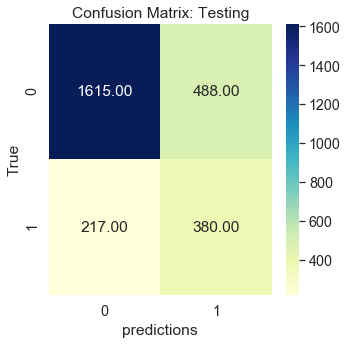

In [413]:
preds = model.predict(X_test)
eval_matrix(y_test, preds, 'Testing')

### Production test

In [406]:
X_prod = preprocessing(df_prod.drop(columns=['default payment next month']),with_corr=True)
y_prod = df_prod['default payment next month']
X_prod.head()

LIMIT_BAL  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  \
15119      20000      1      2      2      2      2      0       9453   
6768      480000     -1     -1     -2     -1     -1     -1       7066   
24701     280000      0      0      0      0      0      0     138984   
7595       50000      1     -2     -2     -2     -2     -2          0   
1716      140000      0      0      0      0      0      0     142087   

       BILL_AMT3  BILL_AMT5  ...  SEX_female  EDUCATION_graduate school  \
15119      10730      11748  ...           0                          0   
6768        4279      76738  ...           1                          1   
24701     145127     115765  ...           0                          1   
7595           0          0  ...           0                          0   
1716      140057     100873  ...           0                          1   

       EDUCATION_high school  EDUCATION_others  EDUCATION_university  \
15119                      1                 0                     0   
6768                       0                 0                     0   
24701                      0                 0                     0   
7595                       0                 0                     1   
1716                       0                 0                     0   

       MARRIAGE_married  MARRIAGE_unknown  age_bin_21 to 35  age_bin_56 to 70  \
15119                 1                 0                 0                 1   
6768                  0                 0                 0                 1   
24701                 0                 0                 0                 0   
7595                  0                 0                 1                 0   
1716                  0                 0                 1                 0   

       age_bin_above 70  
15119                 0  
6768                  0  
24701                 0  
7595                  0  
1716                  0  

[5 rows x 26 columns]

In [407]:
X_prod.shape,X_train.shape

((3000, 26), (24300, 26))

Accuracy: 0.746
Precision: 0.44979508196721313
Recall: 0.661144578313253
F1_score: 0.5353658536585365


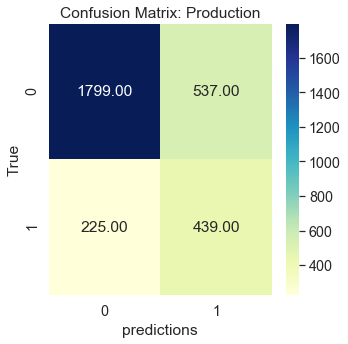

In [414]:
preds = model.predict(X_prod)
eval_matrix(y_prod, preds, 'Production')

### 1.The Methods at Algorithm Level.
<ol>
<li> Under sampling (decrease the `majority` class to be equal the `minority` one)</li>
<li> Over sampling (increase the `minority` class to be equal the `majority` one)</li>
</ol>
Because the dataset is small we cannot work with option 1, as we will lose alot of information.

## OverSampling

In [415]:
df_u = preprocessing(df_train.copy())
df_u.head()

ID  LIMIT_BAL  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  \
20701  20702      30000      1      2      2      2      2      2      25826   
10709  10710     240000     -2     -2     -2     -2     -2     -2          0   
5058    5059     200000     -1     -1     -1     -1      0     -1      10118   
715      716      50000      0      0      0      0      0      0      34962   
23948  23949      50000      0      0      0      0      0     -1      47871   

       BILL_AMT2  ...  EDUCATION_high school  EDUCATION_others  \
20701      27274  ...                      0                 0   
10709          0  ...                      0                 0   
5058        2105  ...                      0                 0   
715        32275  ...                      0                 0   
23948      44546  ...                      0                 0   

       EDUCATION_university  MARRIAGE_married  MARRIAGE_single  \
20701                     0                 0                1   
10709                     0                 1                0   
5058                      0                 1                0   
715                       1                 1                0   
23948                     1                 0                1   

       MARRIAGE_unknown  age_bin_21 to 35  age_bin_36 to 55  age_bin_56 to 70  \
20701                 0                 1                 0                 0   
10709                 0                 0                 1                 0   
5058                  0                 1                 0                 0   
715                   0                 0                 1                 0   
23948                 0                 1                 0                 0   

       age_bin_above 70  
20701                 0  
10709                 0  
5058                  0  
715                   0  
23948                 0  

[5 rows x 34 columns]

In [416]:
df_u.columns

Index(['ID', 'LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'Default', 'SEX_female', 'SEX_male',
       'EDUCATION_graduate school', 'EDUCATION_high school',
       'EDUCATION_others', 'EDUCATION_university', 'MARRIAGE_married',
       'MARRIAGE_single', 'MARRIAGE_unknown', 'age_bin_21 to 35',
       'age_bin_36 to 55', 'age_bin_56 to 70', 'age_bin_above 70'],
      dtype='object')

In [418]:
#!pip install imblearn
from imblearn.over_sampling import SMOTE 

# Drop the columns from your original dataset that you don't need
X = df_u.drop(columns=['Default','ID'])

# Use the class feature as the labels
y = df_u['Default']

sm = SMOTE(random_state=35)
X_res, y_res = sm.fit_resample(X, y)

In [427]:
smote_df = pd.DataFrame(X_res,columns=X.columns)
smote_df['Default'] = y_res
smote_df.head()

LIMIT_BAL  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  \
0      30000      1      2      2      2      2      2      25826      27274   
1     240000     -2     -2     -2     -2     -2     -2          0          0   
2     200000     -1     -1     -1     -1      0     -1      10118       2105   
3      50000      0      0      0      0      0      0      34962      32275   
4      50000      0      0      0      0      0     -1      47871      44546   

   BILL_AMT3  ...  EDUCATION_others  EDUCATION_university  MARRIAGE_married  \
0      25744  ...                 0                     0                 0   
1          0  ...                 0                     0                 1   
2        483  ...                 0                     0                 1   
3      31253  ...                 0                     1                 1   
4      28628  ...                 0                     1                 0   

   MARRIAGE_single  MARRIAGE_unknown  age_bin_21 to 35  age_bin_36 to 55  \
0                1                 0                 1                 0   
1                0                 0                 0                 1   
2                0                 0                 1                 0   
3                0                 0                 0                 1   
4                1                 0                 1                 0   

   age_bin_56 to 70  age_bin_above 70  Default  
0                 0                 0        0  
1                 0                 0        0  
2                 0                 0        0  
3                 0                 0        0  
4                 0                 0        0  

[5 rows x 33 columns]

In [429]:
smote_df.shape

(42056, 33)

In [430]:
smote_df.duplicated().sum()

552

In [431]:
smote_df.drop_duplicates(inplace=True)

In [432]:
smote_df.duplicated().sum()

0

##### Check for correlation between features after oversampling

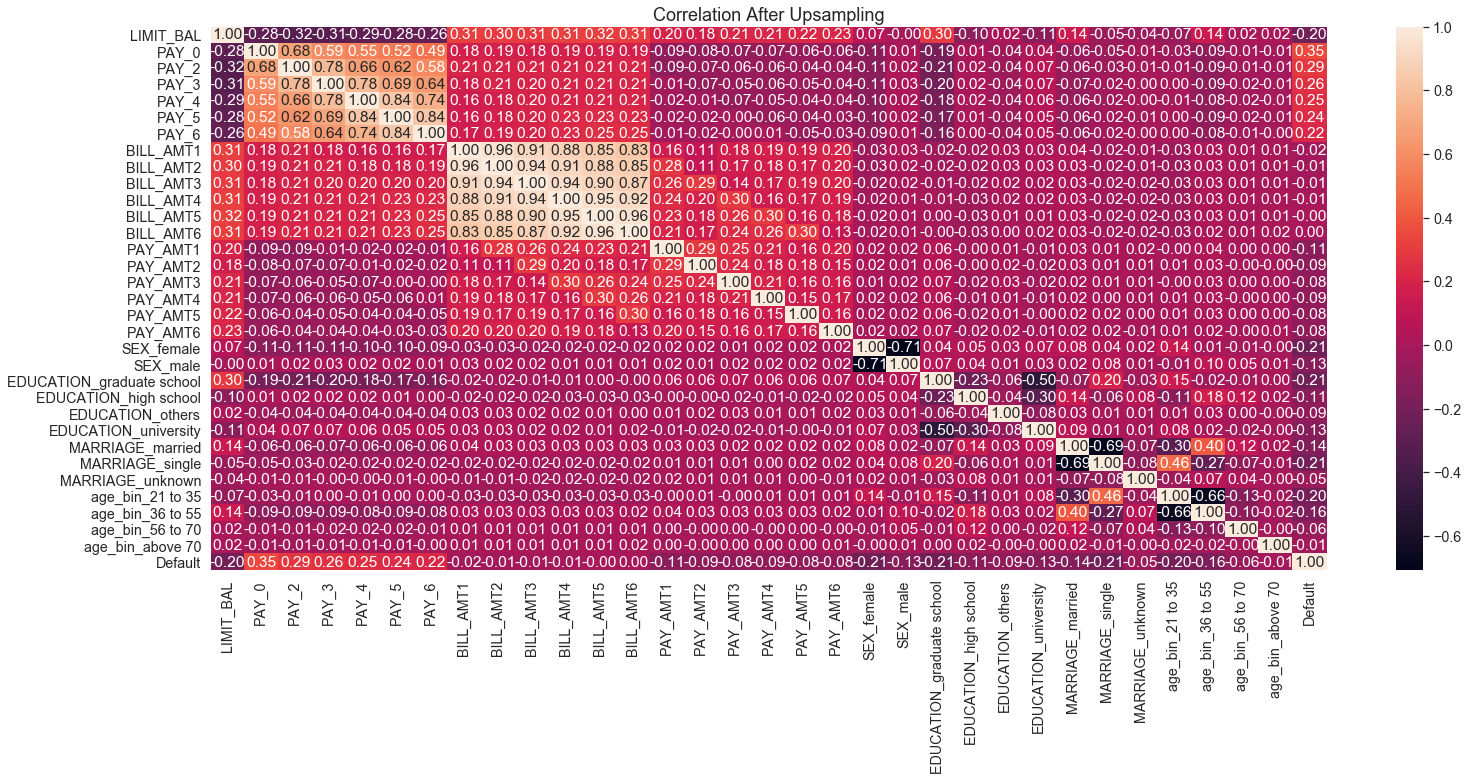

In [433]:
plt.figure(figsize = (25,10))

correlation_matrix_over = smote_df.corr()
sns.heatmap(correlation_matrix_over, annot=True,fmt=".2f");

plt.title('Correlation After Upsampling',fontdict={'size':'18'})
plt.show()

In [434]:
corr_over_col = remove_corr(correlation_matrix_over,0.89)
print(corr_over_col)

['BILL_AMT2', 'BILL_AMT6', 'BILL_AMT5', 'BILL_AMT3']


In [435]:
smote_df.drop(columns=corr_over_col,inplace=True)

### Model Selection (UpSampling)

In [436]:
X_res, y_res = smote_df.drop(columns='Default'),smote_df.Default

In [437]:
X_train_u,X_test_u,y_train_u,y_test_u=train_test_split(X_res
                                               ,y_res
                                               ,test_size=0.1
                                               , random_state=42
                                               , shuffle=True
                                              )

In [440]:
model_sel(X=X_train_u, y=y_train_u, metric='f1')

>LogisticRegression: 
>LogisticRegression: 0.45323463912581097 f1=[0.45720214 0.4540578  0.45890527 0.44440631 0.45160167] 
**************************************************
>SGDClassifier: 
>SGDClassifier: 0.27424640707015924 f1=[0.         0.45797485 0.         0.3348738  0.57838338] 
**************************************************
>LinearSVC: 
>LinearSVC: 0.2612700649960429 f1=[0.0503945  0.1420373  0.67064579 0.         0.44327273] 
**************************************************
>RandomForestClassifier: 
>RandomForestClassifier: 0.8665530371517576 f1=[0.86686266 0.86378455 0.86003089 0.87026342 0.87182367] 
**************************************************
>XGBClassifier: 
>XGBClassifier: 0.8601616494705613 f1=[0.85693746 0.85443959 0.85849462 0.86512828 0.8658083 ] 
**************************************************


#### Evaluate RandomForest

>RandomForestClassifier: 
********** 1 fold **********
Accuracy: 0.9984940767016933
Precision: 0.9986492874991558
Recall: 0.9983121793140697
F1_score: 0.9984807049529019


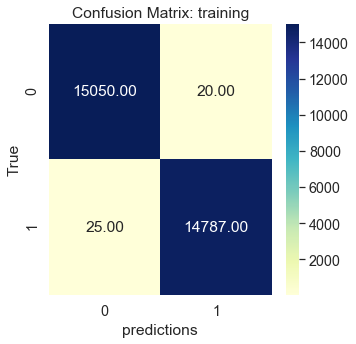

Accuracy: 0.8720385490563513
Precision: 0.902431878113097
Recall: 0.831758034026465
F1_score: 0.865654862282181


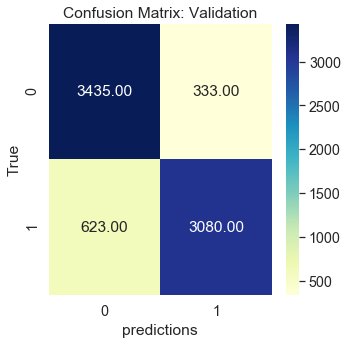

********** 2 fold **********
Accuracy: 0.9984940767016933
Precision: 0.9991886958285444
Recall: 0.997772076694572
F1_score: 0.9984798837955613


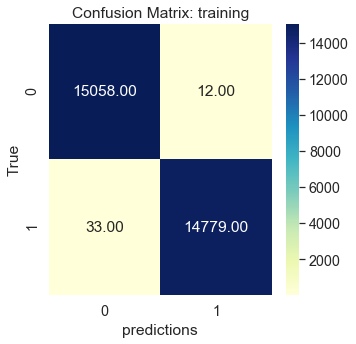

Accuracy: 0.871636996386026
Precision: 0.9115176964607079
Recall: 0.8206859303267621
F1_score: 0.8637203353701861


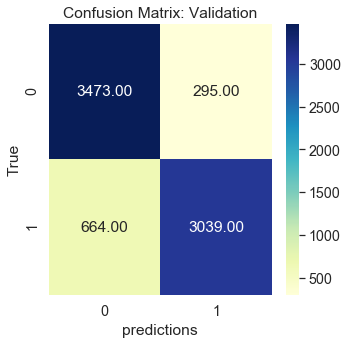

********** 3 fold **********
Accuracy: 0.998929121210093
Precision: 0.999054565099946
Recall: 0.9987847691061301
F1_score: 0.9989196488858879


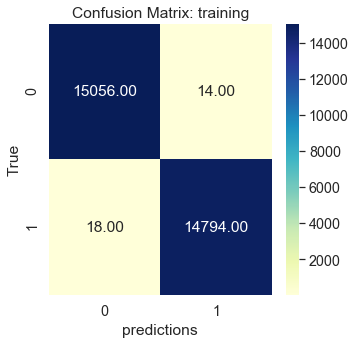

Accuracy: 0.8694953821442912
Precision: 0.8988304093567251
Recall: 0.8301377261679719
F1_score: 0.8631194721325284


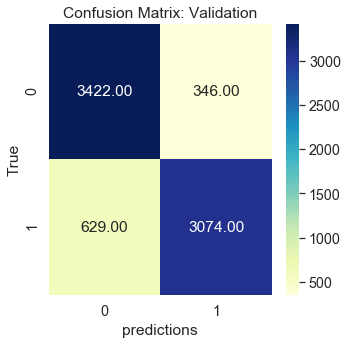

********** 4 fold **********
Accuracy: 0.998393735568718
Precision: 0.9982451403887689
Recall: 0.9985147177963813
F1_score: 0.9983799108950993


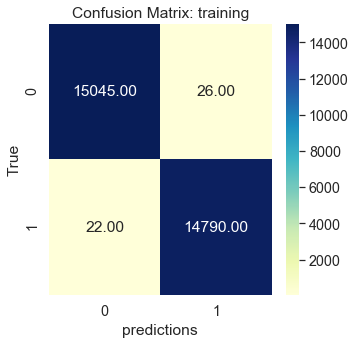

Accuracy: 0.8764390896921017
Precision: 0.9081033470346448
Recall: 0.8352687010532001
F1_score: 0.8701645801097202


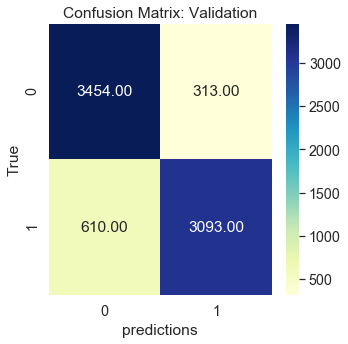

********** 5 fold **********
Accuracy: 0.9985610547803099
Precision: 0.9982457324067202
Recall: 0.9988522819335673
F1_score: 0.9985489150609118


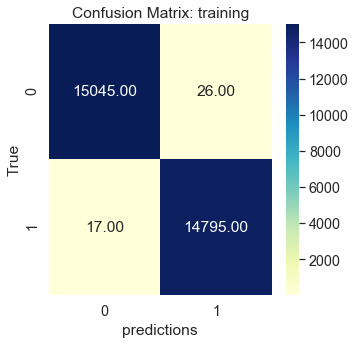

Accuracy: 0.8781793842034806
Precision: 0.9060773480662984
Recall: 0.8414798811774237
F1_score: 0.8725847101652199


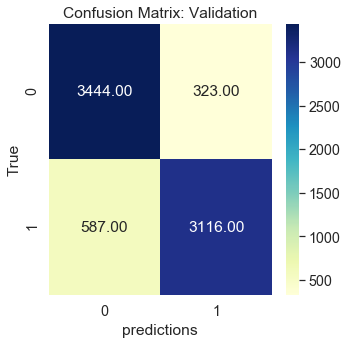

>RandomForestClassifier: 0.867048792011967 f1=[0.865654862282181, 0.8637203353701861, 0.8631194721325284, 0.8701645801097202, 0.8725847101652199] 
**************************************************


In [444]:
model_sel(X=X_train_u
          , y=y_train_u
          , model=RandomForestClassifier()
          , draw=True
         , metric='f1')

In [442]:
model=RandomForestClassifier()
model.fit(X=X_train_u
          , y=y_train_u)

RandomForestClassifier()

Accuracy: 0.9982063020373196
Precision: 0.9983252296056185
Recall: 0.9980556305698083
F1_score: 0.9981904118838623


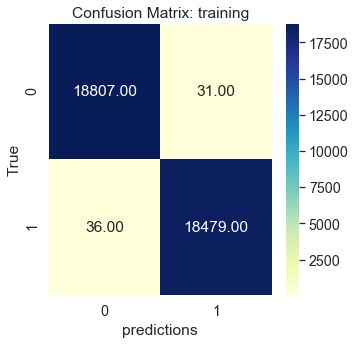

Accuracy: 0.8749698867742712
Precision: 0.9092323651452282
Recall: 0.8359561278016213
F1_score: 0.8710559006211179


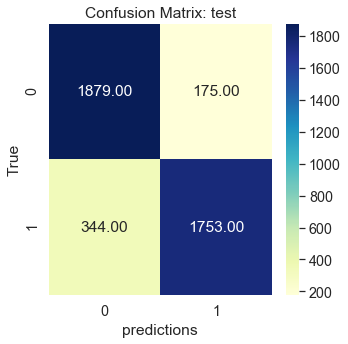

In [445]:
preds = model.predict(X_train_u)
eval_matrix(y_train_u, preds, 'training')
preds = model.predict(X_test_u)
eval_matrix(y_test_u, preds, 'test')

Model overfiting

#### Check GradientBoostingClassifier

>XGBClassifier: 
[00:45:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
********** 1 fold **********
Accuracy: 0.9220266381098989
Precision: 0.9694599067248383
Recall: 0.8701053200108021
F1_score: 0.9170995516971466


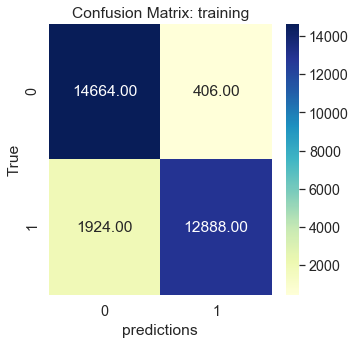

Accuracy: 0.8668183643421229
Precision: 0.9163591635916359
Recall: 0.8047529030515798
F1_score: 0.8569374550682962


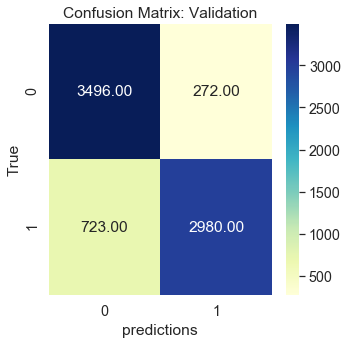

[00:45:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
********** 2 fold **********
Accuracy: 0.9232983066729135
Precision: 0.96968787515006
Recall: 0.8725357817985417
F1_score: 0.9185501066098081


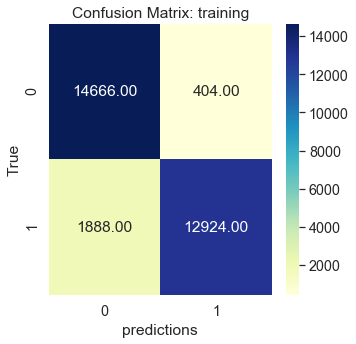

Accuracy: 0.8661491098915808
Precision: 0.9267445532049258
Recall: 0.7926005941128814
F1_score: 0.8544395924308589


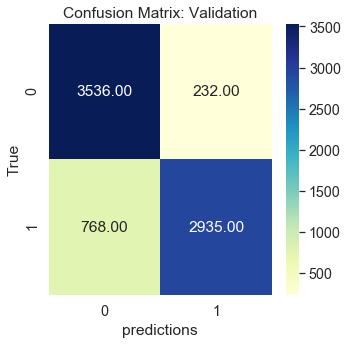

[00:45:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
********** 3 fold **********
Accuracy: 0.9208218994712536
Precision: 0.9686699804187378
Recall: 0.8683499864974346
F1_score: 0.9157707369170524


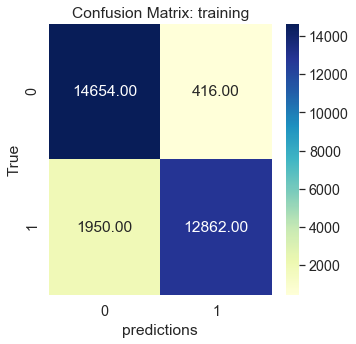

Accuracy: 0.8678891714629903
Precision: 0.9150366748166259
Recall: 0.8085336213880637
F1_score: 0.858494623655914


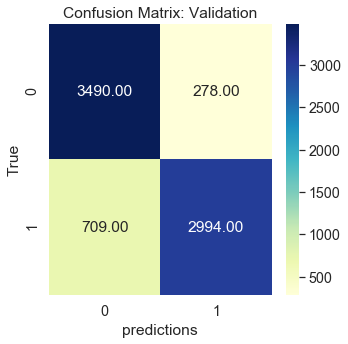

[00:45:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
********** 4 fold **********
Accuracy: 0.9189171100625774
Precision: 0.9665587105520825
Recall: 0.8663921145017554
F1_score: 0.9137384741357827


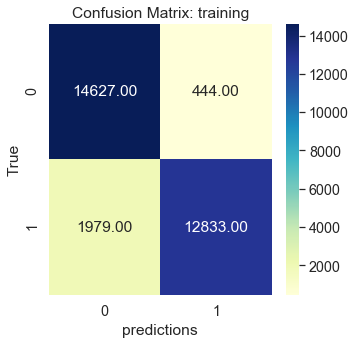

Accuracy: 0.8740294511378849
Precision: 0.921808185705559
Recall: 0.8150148528220362
F1_score: 0.8651282786297836


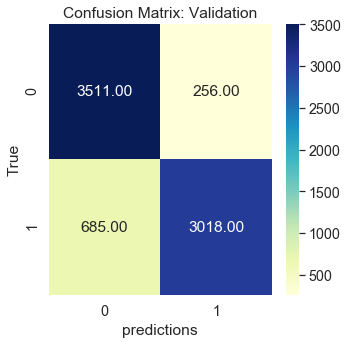

[00:45:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
********** 5 fold **********
Accuracy: 0.9171100625773851
Precision: 0.966916496328261
Recall: 0.8622738320280854
F1_score: 0.9116020127761323


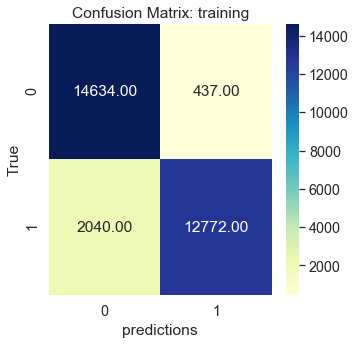

Accuracy: 0.8744310575635876
Precision: 0.9205962884088835
Recall: 0.817175263300027
F1_score: 0.8658082975679542


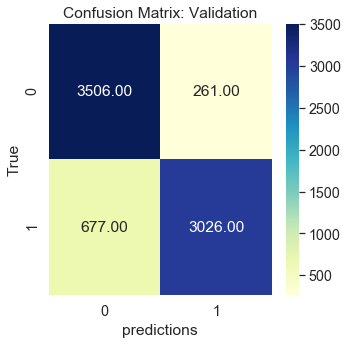

>XGBClassifier: 0.8601616494705613 f1=[0.8569374550682962, 0.8544395924308589, 0.858494623655914, 0.8651282786297836, 0.8658082975679542] 
**************************************************


In [447]:
model_sel(X=X_train_u
          , y=y_train_u
          , model=XGBClassifier()
          , draw=True
          ,metric='f1')

In [448]:
model=XGBClassifier()
model.fit(X=X_train_u
          , y=y_train_u)

[00:45:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Accuracy: 0.9148127325783739
Precision: 0.9639895902681112
Recall: 0.8602754523359438
F1_score: 0.9091843141731833


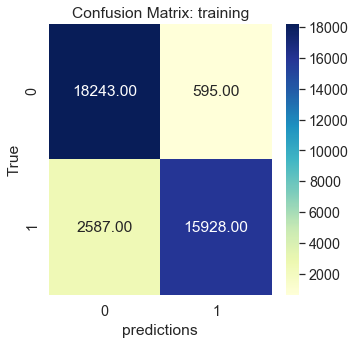

Accuracy: 0.8725608287159721
Precision: 0.9274809160305344
Recall: 0.8111587982832618
F1_score: 0.8654286441109132


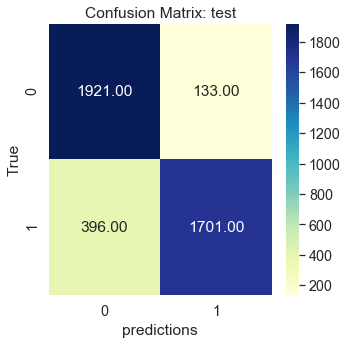

In [449]:
preds = model.predict(X_train_u)
eval_matrix(y_train_u, preds, 'training')
preds = model.predict(X_test_u)
eval_matrix(y_test_u, preds, 'test')

## Test a model

In [450]:
X_prod = preprocessing(df_prod.drop(columns=['default payment next month']),with_corr=True,work_type='over')
y_prod = df_prod['default payment next month']

Accuracy: 0.81
Precision: 0.6151960784313726
Recall: 0.37801204819277107
F1_score: 0.4682835820895522


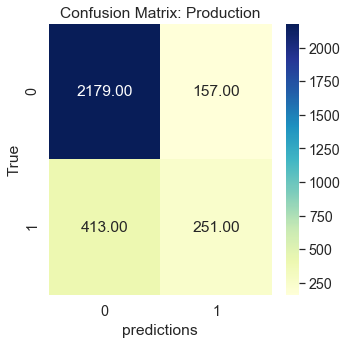

In [451]:
preds = model.predict(X_prod)
eval_matrix(y_prod, preds, 'Production')

### Try borderline smote

In [455]:
from imblearn.over_sampling import BorderlineSMOTE 
X_resampled, y_resampled = BorderlineSMOTE().fit_resample(X, y)

In [456]:
X_resampled.shape

(42056, 32)

In [457]:
Borderline_df = pd.DataFrame(X_resampled,columns=X.columns)
Borderline_df['Default'] = y_resampled
Borderline_df.head()

LIMIT_BAL  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  \
0      30000      1      2      2      2      2      2      25826      27274   
1     240000     -2     -2     -2     -2     -2     -2          0          0   
2     200000     -1     -1     -1     -1      0     -1      10118       2105   
3      50000      0      0      0      0      0      0      34962      32275   
4      50000      0      0      0      0      0     -1      47871      44546   

   BILL_AMT3  ...  EDUCATION_others  EDUCATION_university  MARRIAGE_married  \
0      25744  ...                 0                     0                 0   
1          0  ...                 0                     0                 1   
2        483  ...                 0                     0                 1   
3      31253  ...                 0                     1                 1   
4      28628  ...                 0                     1                 0   

   MARRIAGE_single  MARRIAGE_unknown  age_bin_21 to 35  age_bin_36 to 55  \
0                1                 0                 1                 0   
1                0                 0                 0                 1   
2                0                 0                 1                 0   
3                0                 0                 0                 1   
4                1                 0                 1                 0   

   age_bin_56 to 70  age_bin_above 70  Default  
0                 0                 0        0  
1                 0                 0        0  
2                 0                 0        0  
3                 0                 0        0  
4                 0                 0        0  

[5 rows x 33 columns]

In [458]:
Borderline_df.duplicated().sum()

519

In [459]:
Borderline_df.drop_duplicates(inplace=True)

In [460]:
Borderline_df.duplicated().sum()

0

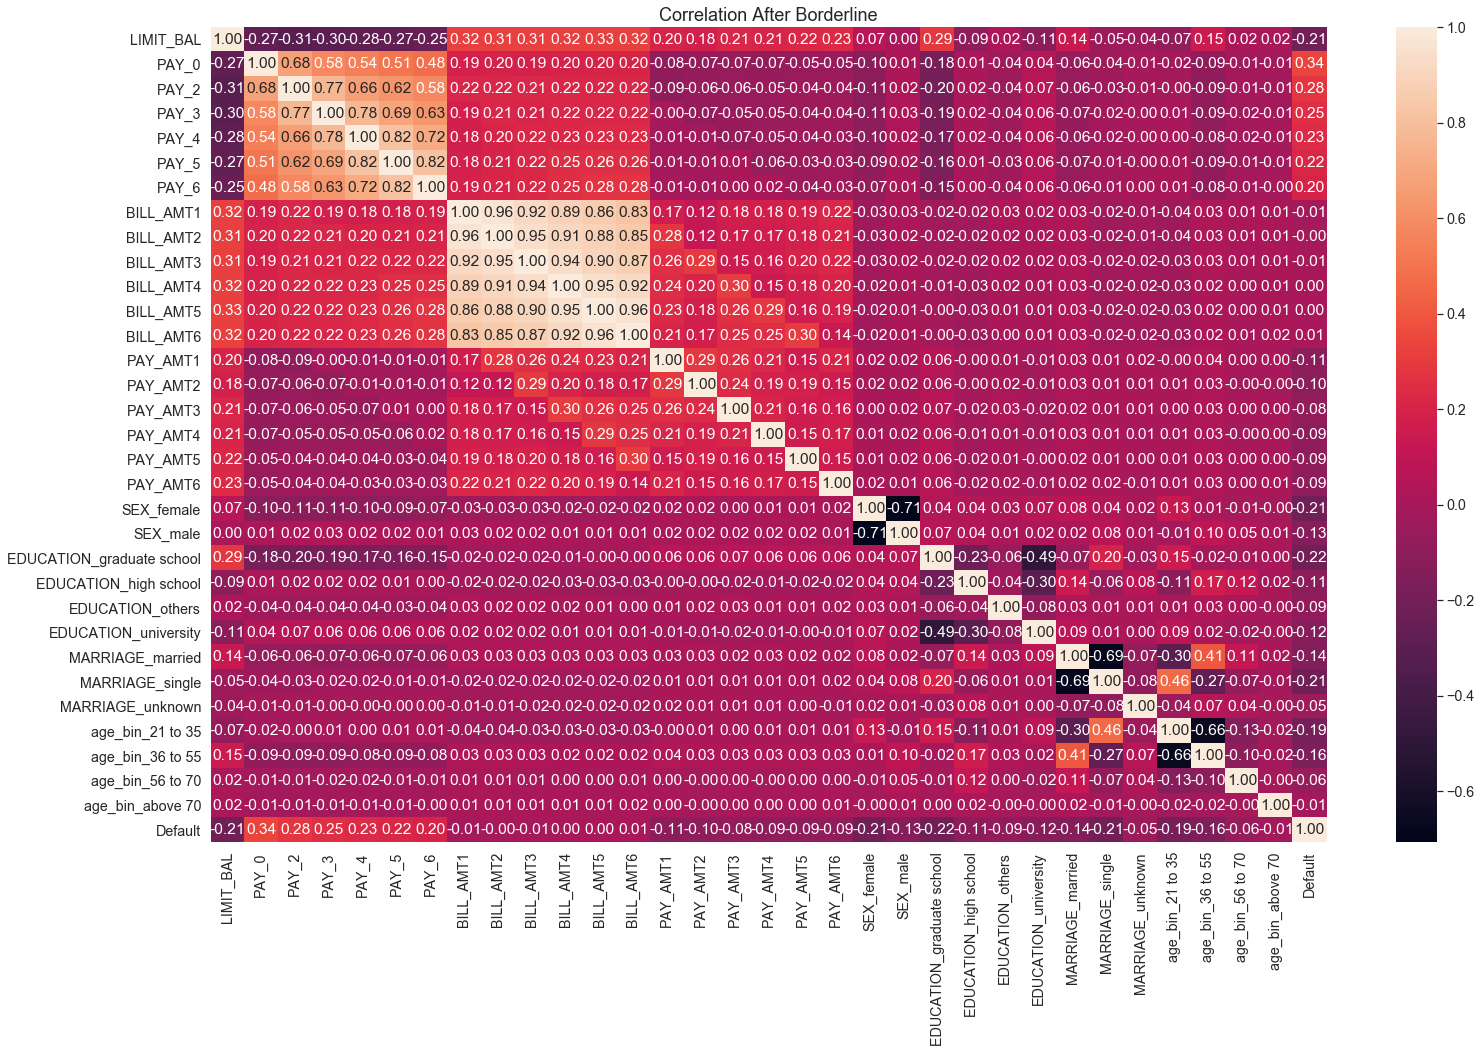

In [461]:
plt.figure(figsize = (25,15))

correlation_matrix_over = Borderline_df.corr()
sns.heatmap(correlation_matrix_over, annot=True,fmt=".2f");

plt.title('Correlation After Borderline',fontdict={'size':'18'})
plt.show()

In [462]:
corr_over_col = remove_corr(correlation_matrix_over,0.89)
print(corr_over_col)

['BILL_AMT2', 'BILL_AMT6', 'BILL_AMT5', 'BILL_AMT3']


In [463]:
Borderline_df.drop(columns=corr_over_col,inplace=True)

In [464]:
X_resempled, y_resempled = Borderline_df.drop(columns='Default'),Borderline_df.Default
X_train_border,X_test_border,y_train_border,y_test_border=train_test_split(X_resempled
                                                                           ,y_resempled
                                                                           ,test_size=0.1
                                                                           , random_state=42
                                                                           , shuffle=True
                                                                          )

In [465]:
model_sel(X=X_train_border, y=y_train_border, metric='f1')

>LogisticRegression: 
>LogisticRegression: 0.4481105868608105 f1=[0.44284982 0.45235638 0.44946126 0.44566902 0.45021645] 
**************************************************
>SGDClassifier: 
>SGDClassifier: 0.39673104488920985 f1=[0.         0.00428151 0.66280543 0.66917789 0.6473904 ] 
**************************************************
>LinearSVC: 
>LinearSVC: 0.3928155829419353 f1=[0.65706268 0.59285806 0.00214765 0.04277806 0.66923147] 
**************************************************
>RandomForestClassifier: 
>RandomForestClassifier: 0.8696003831431589 f1=[0.86980842 0.8744238  0.86891177 0.86578027 0.86907766] 
**************************************************
>XGBClassifier: 
>XGBClassifier: 0.8590937393122445 f1=[0.85693766 0.86049171 0.8607631  0.85742829 0.85984794] 
**************************************************


In [466]:
model=XGBClassifier()
model.fit(X=X_train_border
          , y=y_train_border)

[01:28:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Accuracy: 0.9146938447957628
Precision: 0.9628851120052849
Recall: 0.8618039131369598
F1_score: 0.9095447454261806


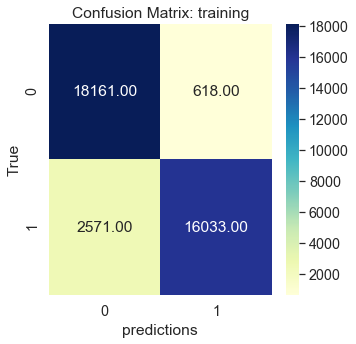

Accuracy: 0.8772267693789119
Precision: 0.9212988442487617
Recall: 0.8201861832435081
F1_score: 0.8678071539657854


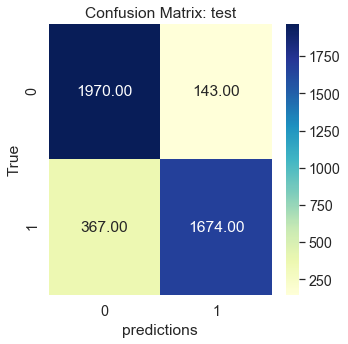

In [467]:
preds = model.predict(X_train_border)
eval_matrix(y_train_border, preds, 'training')
preds = model.predict(X_test_border)
eval_matrix(y_test_border, preds, 'test')

Accuracy: 0.8096666666666666
Precision: 0.6131386861313869
Recall: 0.3795180722891566
F1_score: 0.4688372093023256


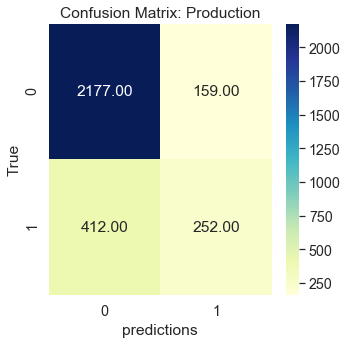

In [468]:
preds = model.predict(X_prod)
eval_matrix(y_prod, preds, 'Production')

### Try SVM smote

In [513]:
from imblearn.over_sampling import SVMSMOTE 
X_resampled, y_resampled = SVMSMOTE(sampling_strategy ='minority',m_neighbors=5).fit_resample(X, y)

In [514]:
X_resampled.shape

(42056, 32)

In [515]:
svm_df = pd.DataFrame(X_resampled,columns=X.columns)
svm_df['Default'] = y_resampled
svm_df.head()

LIMIT_BAL  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  \
0      30000      1      2      2      2      2      2      25826      27274   
1     240000     -2     -2     -2     -2     -2     -2          0          0   
2     200000     -1     -1     -1     -1      0     -1      10118       2105   
3      50000      0      0      0      0      0      0      34962      32275   
4      50000      0      0      0      0      0     -1      47871      44546   

   BILL_AMT3  ...  EDUCATION_others  EDUCATION_university  MARRIAGE_married  \
0      25744  ...                 0                     0                 0   
1          0  ...                 0                     0                 1   
2        483  ...                 0                     0                 1   
3      31253  ...                 0                     1                 1   
4      28628  ...                 0                     1                 0   

   MARRIAGE_single  MARRIAGE_unknown  age_bin_21 to 35  age_bin_36 to 55  \
0                1                 0                 1                 0   
1                0                 0                 0                 1   
2                0                 0                 1                 0   
3                0                 0                 0                 1   
4                1                 0                 1                 0   

   age_bin_56 to 70  age_bin_above 70  Default  
0                 0                 0        0  
1                 0                 0        0  
2                 0                 0        0  
3                 0                 0        0  
4                 0                 0        0  

[5 rows x 33 columns]

In [516]:
svm_df.duplicated().sum()

1049

In [517]:
svm_df.drop_duplicates(inplace=True)

In [518]:
svm_df.duplicated().sum()

0

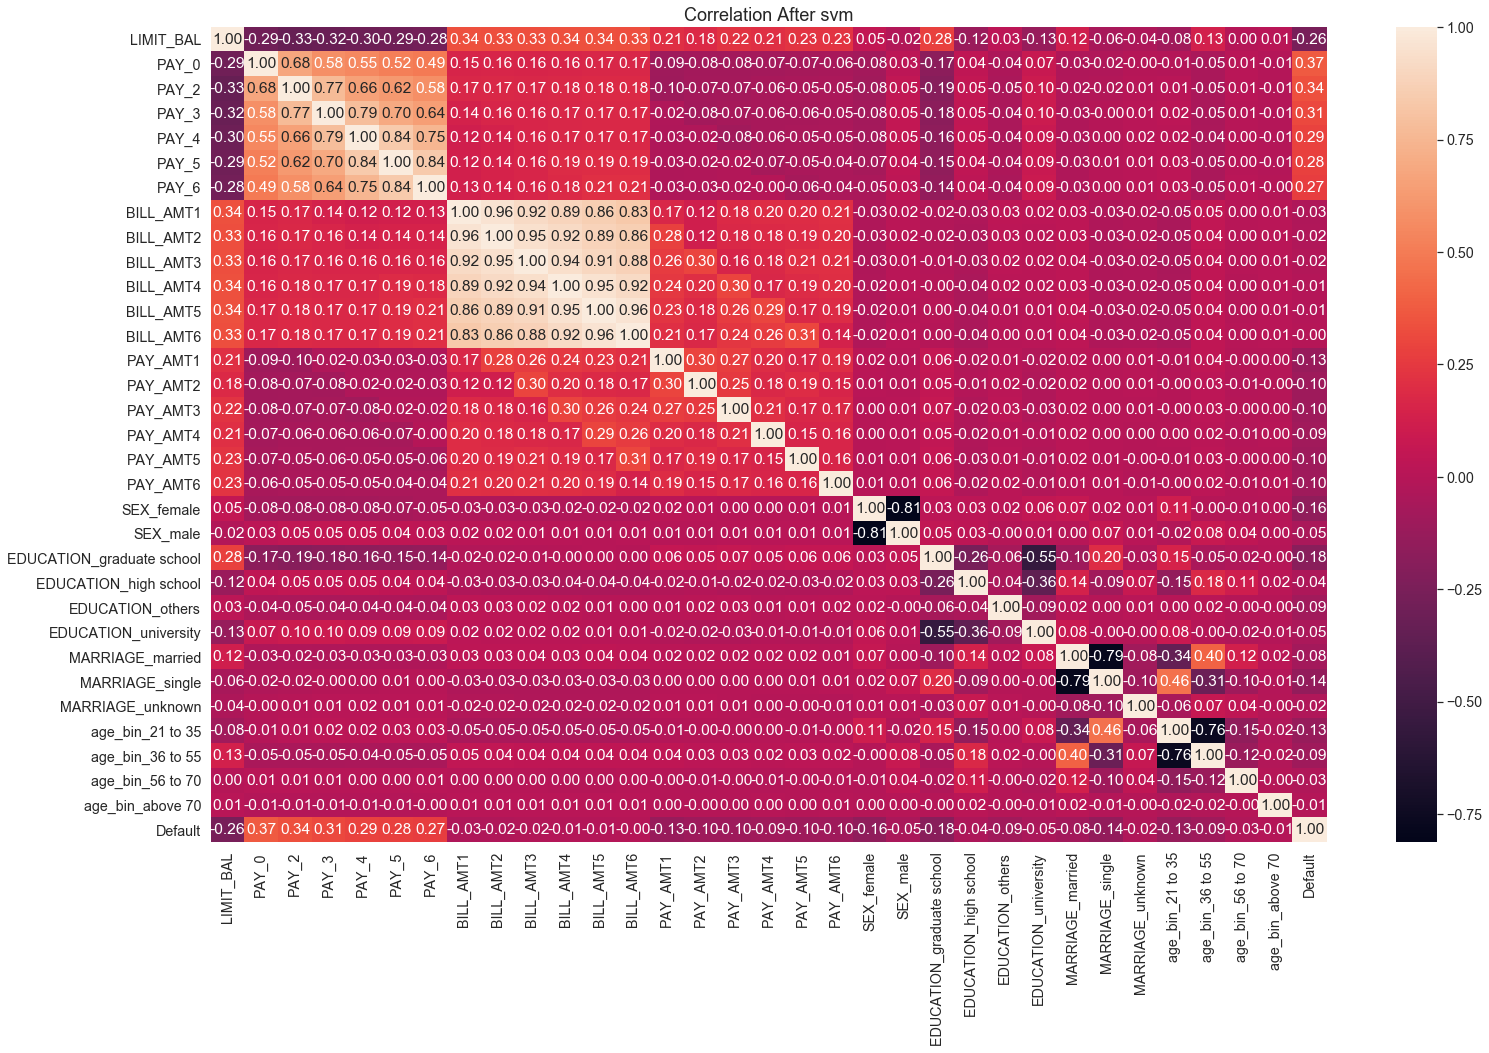

In [519]:
plt.figure(figsize = (25,15))

correlation_matrix_over = svm_df.corr()
sns.heatmap(correlation_matrix_over, annot=True,fmt=".2f");

plt.title('Correlation After svm',fontdict={'size':'18'})
plt.show()

In [520]:
corr_over_col = remove_corr(correlation_matrix_over,0.89)
print(corr_over_col)

['BILL_AMT2', 'BILL_AMT4', 'BILL_AMT6', 'BILL_AMT3']


In [521]:
svm_df.drop(columns=corr_over_col,inplace=True)

In [522]:
X_resempled, y_resempled = svm_df.drop(columns='Default'),svm_df.Default
X_train_svm,X_test_svm,y_train_svm,y_test_svm=train_test_split(X_resempled
                                                                           ,y_resempled
                                                                           ,test_size=0.1
                                                                           , random_state=42
                                                                           , shuffle=True
                                                                          )

In [523]:
model_sel(X=X_train_svm, y=y_train_svm,model=XGBClassifier(), metric='f1')

>XGBClassifier: 
>XGBClassifier: 0.8477248237850334 f1=[0.84871719 0.85174967 0.84636749 0.84876045 0.84302931] 
**************************************************


In [524]:
model=XGBClassifier()
model.fit(X=X_train_svm
          , y=y_train_svm)

[02:22:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Accuracy: 0.8983363138785021
Precision: 0.9480592187111222
Recall: 0.8393545544663509
F1_score: 0.8904013553776947


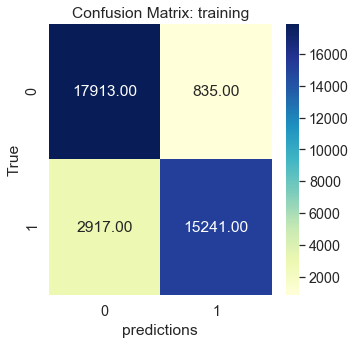

Accuracy: 0.8678371128992929
Precision: 0.9106210098665118
Recall: 0.8017373530914665
F1_score: 0.8527173913043478


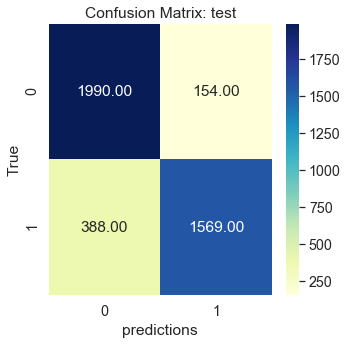

In [525]:
preds = model.predict(X_train_svm)
eval_matrix(y_train_svm, preds, 'training')
preds = model.predict(X_test_svm)
eval_matrix(y_test_svm, preds, 'test')

In [527]:
X_prod = preprocessing(df_prod.drop(columns=['default payment next month']),with_corr=True,work_type='over')
y_prod = df_prod['default payment next month']

Accuracy: 0.8063333333333333
Precision: 0.5916114790286976
Recall: 0.4036144578313253
F1_score: 0.47985675917636533


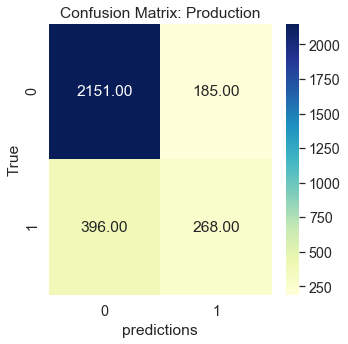

In [528]:
preds = model.predict(X_prod)
eval_matrix(y_prod, preds, 'Production')

## References
[1] Default Credit Card Clients Dataset,<br>
https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset/<br>
[2] Description of Dataset,<br> https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset/discussion/181358<br>
[3] preprocessing<br>
https://towardsdatascience.com/preprocessing-with-sklearn-a-complete-and-comprehensive-guide-670cb98fcfb9<br>
[4] Visualization with seaborn<br> https://www.python-graph-gallery.com/seaborn/<br>
[5] KFold cross validation<br>
https://machinelearningmastery.com/how-to-configure-k-fold-cross-validation/<br>
[6] Metrics and scoring<br>
https://scikit-learn.org/stable/modules/model_evaluation.html<br>
[7] RandomForrestClassifier,<br> http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html<br>
[8]LinearSVC,<br>
https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html<br>
[9]GradientBoostClassifier<br>
https://www.kaggle.com/prashant111/bagging-vs-boosting<br>


